<a href="https://colab.research.google.com/github/pyukumuko/TelecomX_pt2/blob/main/TelecomX_parte2_GFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. ETL e normaliza√ß√£o dos dados

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Carregar os dados
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)


In [51]:
df

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

In [52]:
# Normalizar colunas JSON
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [53]:
# Concatenar em um √∫nico DataFrame
df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

In [54]:
df_final

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7267 rows x 21 columns]

### 1.3 Limpeza da coluna customerID
Retirado a coluna customerID que n√£o tem nenhuma informa√ß√£o:

In [55]:
df_final.drop('customerID', axis=1, inplace=True)

In [56]:
df_final

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       No  Female              0     Yes        Yes       9          Yes   
1       No    Male              0      No         No       9          Yes   
2      Yes    Male              0      No         No       4          Yes   
3      Yes    Male              1     Yes         No      13          Yes   
4      Yes  Female              1     Yes         No       3          Yes   
...    ...     ...            ...     ...        ...     ...          ...   
7262    No  Female              0      No         No      13          Yes   
7263   Yes    Male              0     Yes         No      22          Yes   
7264    No    Male              0      No         No       2          Yes   
7265    No    Male              0     Yes        Yes      67          Yes   
7266    No    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                   No             DSL             No          Yes   
1                  Yes             DSL             No           No   
2                   No     Fiber optic             No           No   
3                   No     Fiber optic             No          Yes   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7262                No             DSL            Yes           No   
7263               Yes     Fiber optic             No           No   
7264                No             DSL             No          Yes   
7265                No             DSL            Yes           No   
7266  No phone service             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod  Charges.Monthly Charges.Total  
0                 Yes      Mailed check            65.60         593.3  
1                  No      Mailed check            59.90         542.4  
2                 Yes  Electronic check            73.90        280.85  
3                 Yes  Electronic check            98.00       1237.85  
4                 Yes      Mailed check            83.90         267.4  
...               ...               ...              ...           ...  
7262               No      Mailed check            55.15         742.9  
7263              Yes  Electronic check            85.10        1873.7  
7264              Yes      Mailed check            50.30         92.75  
7265               No      Mailed check            67.85       4627.65  
7266               No  Electronic check            59.00        3707.6  

[7267 rows x 20 columns]

### 1.4 Limpeza e Tratamento
Verifica√ß√£o de valores nulos e convers√£o de vari√°veis categ√≥ricas:

In [57]:
# Verificar valores nulos
print(df_final.isnull().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


Resultado: Nenhum dado faltante.

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [59]:
# Converter 'Charges.Total' para num√©rico
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [61]:
print(df_final['Charges.Total'].unique())

[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


In [62]:
# Tratado os valores vazios ['Charges.Total']
df_final.dropna()

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       No  Female              0     Yes        Yes       9          Yes   
1       No    Male              0      No         No       9          Yes   
2      Yes    Male              0      No         No       4          Yes   
3      Yes    Male              1     Yes         No      13          Yes   
4      Yes  Female              1     Yes         No       3          Yes   
...    ...     ...            ...     ...        ...     ...          ...   
7262    No  Female              0      No         No      13          Yes   
7263   Yes    Male              0     Yes         No      22          Yes   
7264    No    Male              0      No         No       2          Yes   
7265    No    Male              0     Yes        Yes      67          Yes   
7266    No    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                   No             DSL             No          Yes   
1                  Yes             DSL             No           No   
2                   No     Fiber optic             No           No   
3                   No     Fiber optic             No          Yes   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7262                No             DSL            Yes           No   
7263               Yes     Fiber optic             No           No   
7264                No             DSL             No          Yes   
7265                No             DSL            Yes           No   
7266  No phone service             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  
0                 Yes      Mailed check            65.60         593.30  
1                  No      Mailed check            59.90         542.40  
2                 Yes  Electronic check            73.90         280.85  
3                 Yes  Electronic check            98.00        1237.85  
4                 Yes      Mailed check            83.90         267.40  
...               ...               ...              ...            ...  
7262               No      Mailed check            55.15         742.90  
7263              Yes  Electronic check            85.10        1873.70  
7264              Yes      Mailed check            50.30          92.75  
7265               No      Mailed check            67.85        4627.65  
7266               No  Electronic check            59.00        3707.60  

[7256 rows x 20 columns]

In [63]:
df_final = df_final.dropna()

In [64]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   object 
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   object 
 17  

In [65]:
df_final

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       No  Female              0     Yes        Yes       9          Yes   
1       No    Male              0      No         No       9          Yes   
2      Yes    Male              0      No         No       4          Yes   
3      Yes    Male              1     Yes         No      13          Yes   
4      Yes  Female              1     Yes         No       3          Yes   
...    ...     ...            ...     ...        ...     ...          ...   
7262    No  Female              0      No         No      13          Yes   
7263   Yes    Male              0     Yes         No      22          Yes   
7264    No    Male              0      No         No       2          Yes   
7265    No    Male              0     Yes        Yes      67          Yes   
7266    No    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                   No             DSL             No          Yes   
1                  Yes             DSL             No           No   
2                   No     Fiber optic             No           No   
3                   No     Fiber optic             No          Yes   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7262                No             DSL            Yes           No   
7263               Yes     Fiber optic             No           No   
7264                No             DSL             No          Yes   
7265                No             DSL            Yes           No   
7266  No phone service             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  
0                 Yes      Mailed check            65.60         593.30  
1                  No      Mailed check            59.90         542.40  
2                 Yes  Electronic check            73.90         280.85  
3                 Yes  Electronic check            98.00        1237.85  
4                 Yes      Mailed check            83.90         267.40  
...               ...               ...              ...            ...  
7262               No      Mailed check            55.15         742.90  
7263              Yes  Electronic check            85.10        1873.70  
7264              Yes      Mailed check            50.30          92.75  
7265               No      Mailed check            67.85        4627.65  
7266               No  Electronic check            59.00        3707.60  

[7256 rows x 20 columns]

### 1.5 Lembrando que clientes, (Yes == 1, Cancelaram) E (No == 0, √© Ativo).

In [66]:
# Codificar 'Churn' (Yes/No ‚Üí 1/0)
df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})

/tmp/ipython-input-3041156518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})


In [67]:
df_final

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       0.0  Female              0     Yes        Yes       9          Yes   
1       0.0    Male              0      No         No       9          Yes   
2       1.0    Male              0      No         No       4          Yes   
3       1.0    Male              1     Yes         No      13          Yes   
4       1.0  Female              1     Yes         No       3          Yes   
...     ...     ...            ...     ...        ...     ...          ...   
7262    0.0  Female              0      No         No      13          Yes   
7263    1.0    Male              0     Yes         No      22          Yes   
7264    0.0    Male              0      No         No       2          Yes   
7265    0.0    Male              0     Yes        Yes      67          Yes   
7266    0.0    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                   No             DSL             No          Yes   
1                  Yes             DSL             No           No   
2                   No     Fiber optic             No           No   
3                   No     Fiber optic             No          Yes   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7262                No             DSL            Yes           No   
7263               Yes     Fiber optic             No           No   
7264                No             DSL             No          Yes   
7265                No             DSL            Yes           No   
7266  No phone service             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  
0                 Yes      Mailed check            65.60         593.30  
1                  No      Mailed check            59.90         542.40  
2                 Yes  Electronic check            73.90         280.85  
3                 Yes  Electronic check            98.00        1237.85  
4                 Yes      Mailed check            83.90         267.40  
...               ...               ...              ...            ...  
7262               No      Mailed check            55.15         742.90  
7263              Yes  Electronic check            85.10        1873.70  
7264              Yes      Mailed check            50.30          92.75  
7265               No      Mailed check            67.85        4627.65  
7266               No  Electronic check            59.00        3707.60  

[7256 rows x 20 columns]

In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   float64
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   object 
 17  

In [69]:
# Verificando dados vazios
df_final.isna().sum()

Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64

In [70]:
# Tratado os valores vazios ['Churn']
df_final = df_final.dropna()

In [71]:
df_final

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       0.0  Female              0     Yes        Yes       9          Yes   
1       0.0    Male              0      No         No       9          Yes   
2       1.0    Male              0      No         No       4          Yes   
3       1.0    Male              1     Yes         No      13          Yes   
4       1.0  Female              1     Yes         No       3          Yes   
...     ...     ...            ...     ...        ...     ...          ...   
7262    0.0  Female              0      No         No      13          Yes   
7263    1.0    Male              0     Yes         No      22          Yes   
7264    0.0    Male              0      No         No       2          Yes   
7265    0.0    Male              0     Yes        Yes      67          Yes   
7266    0.0    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                   No             DSL             No          Yes   
1                  Yes             DSL             No           No   
2                   No     Fiber optic             No           No   
3                   No     Fiber optic             No          Yes   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7262                No             DSL            Yes           No   
7263               Yes     Fiber optic             No           No   
7264                No             DSL             No          Yes   
7265                No             DSL            Yes           No   
7266  No phone service             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  
0                 Yes      Mailed check            65.60         593.30  
1                  No      Mailed check            59.90         542.40  
2                 Yes  Electronic check            73.90         280.85  
3                 Yes  Electronic check            98.00        1237.85  
4                 Yes      Mailed check            83.90         267.40  
...               ...               ...              ...            ...  
7262               No      Mailed check            55.15         742.90  
7263              Yes  Electronic check            85.10        1873.70  
7264              Yes      Mailed check            50.30          92.75  
7265               No      Mailed check            67.85        4627.65  
7266               No  Electronic check            59.00        3707.60  

[7032 rows x 20 columns]

In [72]:
df_final.isna().sum()

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [73]:
df_final


Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       0.0  Female              0     Yes        Yes       9          Yes   
1       0.0    Male              0      No         No       9          Yes   
2       1.0    Male              0      No         No       4          Yes   
3       1.0    Male              1     Yes         No      13          Yes   
4       1.0  Female              1     Yes         No       3          Yes   
...     ...     ...            ...     ...        ...     ...          ...   
7262    0.0  Female              0      No         No      13          Yes   
7263    1.0    Male              0     Yes         No      22          Yes   
7264    0.0    Male              0      No         No       2          Yes   
7265    0.0    Male              0     Yes        Yes      67          Yes   
7266    0.0    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                   No             DSL             No          Yes   
1                  Yes             DSL             No           No   
2                   No     Fiber optic             No           No   
3                   No     Fiber optic             No          Yes   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7262                No             DSL            Yes           No   
7263               Yes     Fiber optic             No           No   
7264                No             DSL             No          Yes   
7265                No             DSL            Yes           No   
7266  No phone service             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  
0                 Yes      Mailed check            65.60         593.30  
1                  No      Mailed check            59.90         542.40  
2                 Yes  Electronic check            73.90         280.85  
3                 Yes  Electronic check            98.00        1237.85  
4                 Yes      Mailed check            83.90         267.40  
...               ...               ...              ...            ...  
7262               No      Mailed check            55.15         742.90  
7263              Yes  Electronic check            85.10        1873.70  
7264              Yes      Mailed check            50.30          92.75  
7265               No      Mailed check            67.85        4627.65  
7266               No  Electronic check            59.00        3707.60  

[7032 rows x 20 columns]

In [74]:
columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

contagens = df_final[columns].value_counts().reset_index(name='Contagem')
display(contagens)

Partner Dependents PhoneService     MultipleLines       OnlineSecurity  \
0         No         No          Yes                No  No internet service   
1        Yes        Yes          Yes                No  No internet service   
2         No         No          Yes                No                   No   
3         No         No          Yes                No  No internet service   
4         No         No          Yes               Yes                   No   
...      ...        ...          ...               ...                  ...   
1101     Yes         No          Yes               Yes                  Yes   
1102     Yes         No          Yes               Yes                  Yes   
1103      No         No           No  No phone service                   No   
1104      No         No           No  No phone service                   No   
1105      No         No           No  No phone service                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
0     No internet service  No internet service  No internet service   
1     No internet service  No internet service  No internet service   
2                      No                   No                   No   
3     No internet service  No internet service  No internet service   
4                      No                   No                   No   
...                   ...                  ...                  ...   
1101                   No                  Yes                  Yes   
1102                   No                  Yes                  Yes   
1103                   No                  Yes                   No   
1104                   No                  Yes                   No   
1105                  Yes                   No                   No   

              StreamingTV      StreamingMovies PaperlessBilling  Contagem  
0     No internet service  No internet service               No       407  
1     No internet service  No internet service               No       281  
2                      No                   No              Yes       171  
3     No internet service  No internet service              Yes       166  
4                      No                   No              Yes       110  
...                   ...                  ...              ...       ...  
1101                   No                   No              Yes         1  
1102                  Yes                   No              Yes         1  
1103                   No                  Yes               No         1  
1104                   No                   No               No         1  
1105                  Yes                  Yes               No         1  

[1106 rows x 12 columns]

In [75]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [76]:
# Substituir "No internet service" & "No phone service"‚Üí "No"

# Lista de colunas relevantes
colunas_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Substituir nas colunas de internet
for coluna in colunas_internet:
    df_final[coluna] = df_final[coluna].replace('No internet service', 'No')

# Substituir na coluna de telefonia
df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')

/tmp/ipython-input-4164808014.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[coluna] = df_final[coluna].replace('No internet service', 'No')
/tmp/ipython-input-4164808014.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')


In [77]:
# Verificar valores √∫nicos ap√≥s substitui√ß√£o
print(df_final['OnlineSecurity'].unique())
# Sa√≠da esperada: ['No' 'Yes'] ou similar

print(df_final['MultipleLines'].unique())
# Sa√≠da esperada: ['No' 'Yes'] ou ['No phone service' removido]

['No' 'Yes']
['No' 'Yes']


In [78]:
df_final


Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       0.0  Female              0     Yes        Yes       9          Yes   
1       0.0    Male              0      No         No       9          Yes   
2       1.0    Male              0      No         No       4          Yes   
3       1.0    Male              1     Yes         No      13          Yes   
4       1.0  Female              1     Yes         No       3          Yes   
...     ...     ...            ...     ...        ...     ...          ...   
7262    0.0  Female              0      No         No      13          Yes   
7263    1.0    Male              0     Yes         No      22          Yes   
7264    0.0    Male              0      No         No       2          Yes   
7265    0.0    Male              0     Yes        Yes      67          Yes   
7266    0.0    Male              0     Yes        Yes      63           No   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1              Yes             DSL             No           No   
2               No     Fiber optic             No           No   
3               No     Fiber optic             No          Yes   
4               No     Fiber optic             No           No   
...            ...             ...            ...          ...   
7262            No             DSL            Yes           No   
7263           Yes     Fiber optic             No           No   
7264            No             DSL             No          Yes   
7265            No             DSL            Yes           No   
7266            No             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  
0                 Yes      Mailed check            65.60         593.30  
1                  No      Mailed check            59.90         542.40  
2                 Yes  Electronic check            73.90         280.85  
3                 Yes  Electronic check            98.00        1237.85  
4                 Yes      Mailed check            83.90         267.40  
...               ...               ...              ...            ...  
7262               No      Mailed check            55.15         742.90  
7263              Yes  Electronic check            85.10        1873.70  
7264              Yes      Mailed check            50.30          92.75  
7265               No      Mailed check            67.85        4627.65  
7266               No  Electronic check            59.00        3707.60  

[7032 rows x 20 columns]

In [79]:
columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

df_final[columns] = df_final[columns].replace({'Yes' : 1, 'No' : 0})
display(df_final)

/tmp/ipython-input-2789964136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[columns] = df_final[columns].replace({'Yes' : 1, 'No' : 0})


Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0.0  Female              0        1           1       9             1   
1       0.0    Male              0        0           0       9             1   
2       1.0    Male              0        0           0       4             1   
3       1.0    Male              1        1           0      13             1   
4       1.0  Female              1        1           0       3             1   
...     ...     ...            ...      ...         ...     ...           ...   
7262    0.0  Female              0        0           0      13             1   
7263    1.0    Male              0        1           0      22             1   
7264    0.0    Male              0        0           0       2             1   
7265    0.0    Male              0        1           1      67             1   
7266    0.0    Male              0        1           1      63             0   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL               0             1   
1                 1             DSL               0             0   
2                 0     Fiber optic               0             0   
3                 0     Fiber optic               0             1   
4                 0     Fiber optic               0             0   
...             ...             ...             ...           ...   
7262              0             DSL               1             0   
7263              1     Fiber optic               0             0   
7264              0             DSL               0             1   
7265              0             DSL               1             0   
7266              0             DSL               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            1            1                0   
1                    0            0            0                1   
2                    1            0            0                0   
3                    1            0            1                1   
4                    0            1            1                0   
...                ...          ...          ...              ...   
7262                 0            1            0                0   
7263                 0            0            0                1   
7264                 0            0            0                0   
7265                 1            1            0                1   
7266                 1            0            1                1   

            Contract  PaperlessBilling     PaymentMethod  Charges.Monthly  \
0           One year                 1      Mailed check            65.60   
1     Month-to-month                 0      Mailed check            59.90   
2     Month-to-month                 1  Electronic check            73.90   
3     Month-to-month                 1  Electronic check            98.00   
4     Month-to-month                 1      Mailed check            83.90   
...              ...               ...               ...              ...   
7262        One year                 0      Mailed check            55.15   
7263  Month-to-month                 1  Electronic check            85.10   
7264  Month-to-month                 1      Mailed check            50.30   
7265        Two year                 0      Mailed check            67.85   
7266        Two year                 0  Electronic check            59.00   

      Charges.Total  
0            593.30  
1            542.40  
2            280.85  
3           1237.85  
4            267.40  
...             ...  
7262         742.90  
7263        1873.70  
7264          92.75  
7265        4627.65  
7266        3707.60  

[7032 rows x 20 columns]

## 2. An√°lise Explorat√≥ria (EDA)
### 2.1 Distribui√ß√£o de Churn

/tmp/ipython-input-1126346808.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Clientes Ativos', 'Clientes que Cancelaram'])


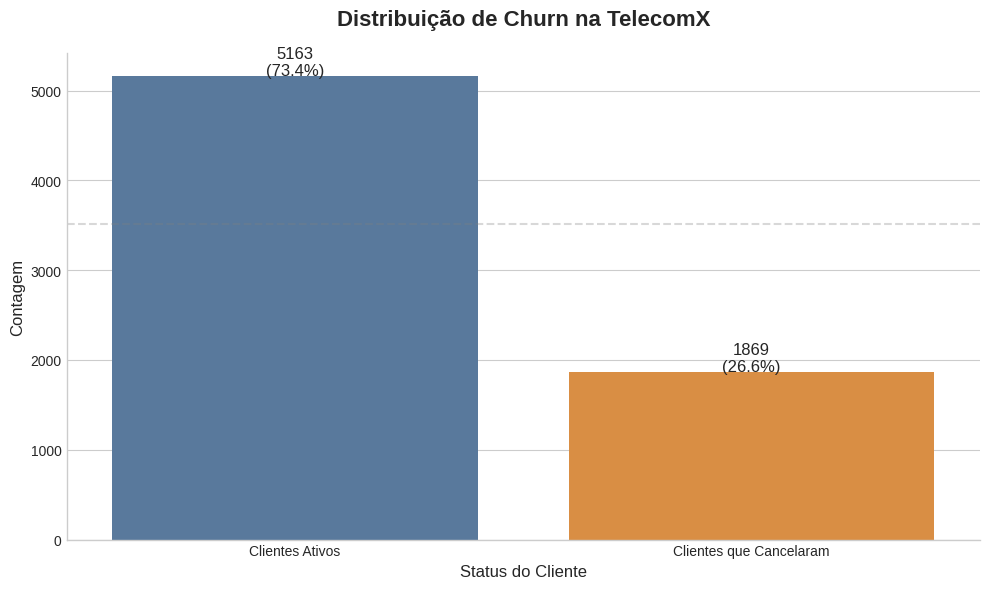

In [80]:
# Configura√ß√£o do gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])

# Remover bordas
sns.despine(top=True, right=True)

# T√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o de Churn na TelecomX', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Alterar r√≥tulos do eixo x
ax.set_xticklabels(['Clientes Ativos', 'Clientes que Cancelaram'])

# Adicionar porcentagens
total = len(df_final)
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n({percentage})',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

# Adicionar linha de m√©dia
plt.axhline(y=total/2, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

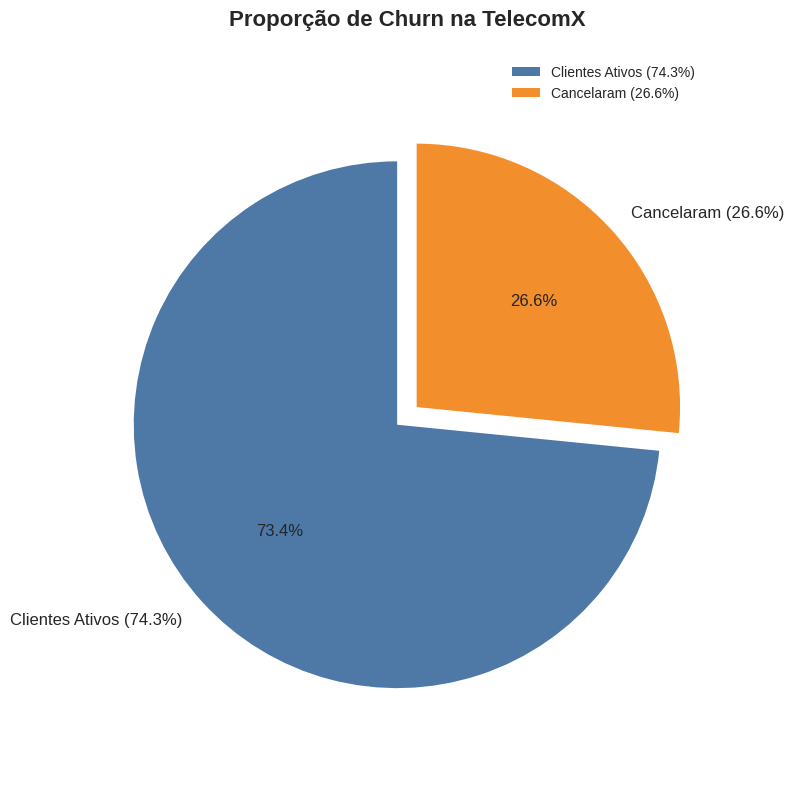

In [81]:
# Dados para o gr√°fico de pizza
churn_counts = df_final['Churn'].value_counts()
labels = ['Clientes Ativos (74.3%)', 'Cancelaram (26.6%)']
colors = ['#4e79a7', '#f28e2b']
explode = (0, 0.1)  # Destaque para a fatia de Churn

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 12})

plt.title('Propor√ß√£o de Churn na TelecomX', fontsize=16, pad=20, fontweight='bold')
plt.axis('equal')  # Assegura que o gr√°fico √© desenhado como um c√≠rculo

# Adicionar legenda
plt.legend(labels, loc='upper right')

plt.tight_layout()
plt.show()

In [82]:
# Quantos clientes cancelaram
df_final['Churn'].value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

### 2.2 An√°lise por Idade (SeniorCitizen)

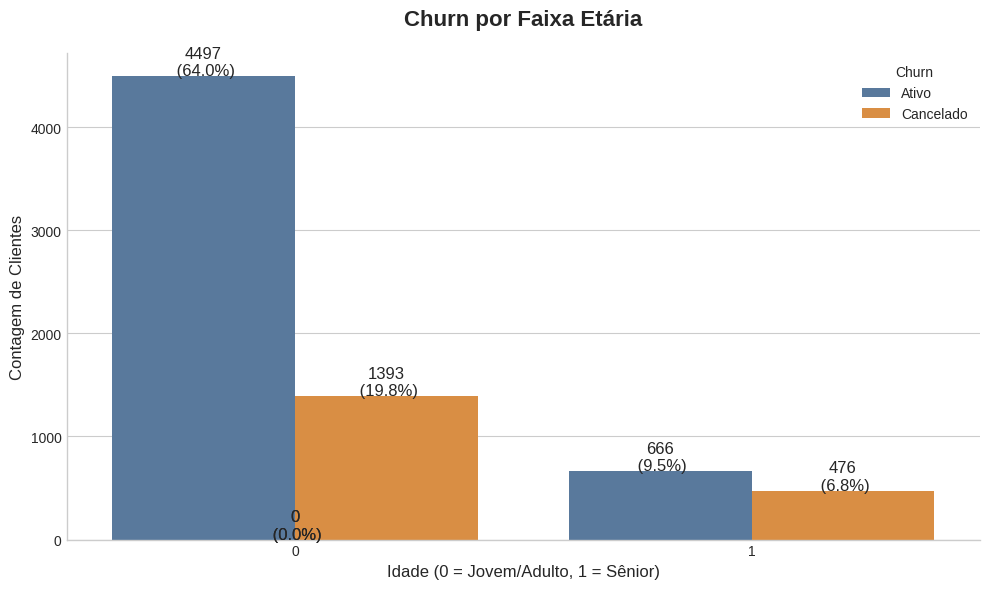

In [83]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df_final,
                  palette=['#4e79a7','#f28e2b'])

# Melhorias visuais
sns.despine(top=True, right=True)
plt.title('Churn por Faixa Et√°ria', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Idade (0 = Jovem/Adulto, 1 = S√™nior)', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)

# Adicionar porcentagens
total = len(df_final)

# Adicionar valores nas barras
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n ({percentage})',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

# Adicionar legenda
plt.legend(title='Churn', labels=['Ativo', 'Cancelado'], loc='upper right')

plt.tight_layout()
plt.show()

In [84]:
totals = df_final['gender'].value_counts().sort_index().values

In [85]:
totals

array([3483, 3549])

### 2.3 An√°lise por G√™nero

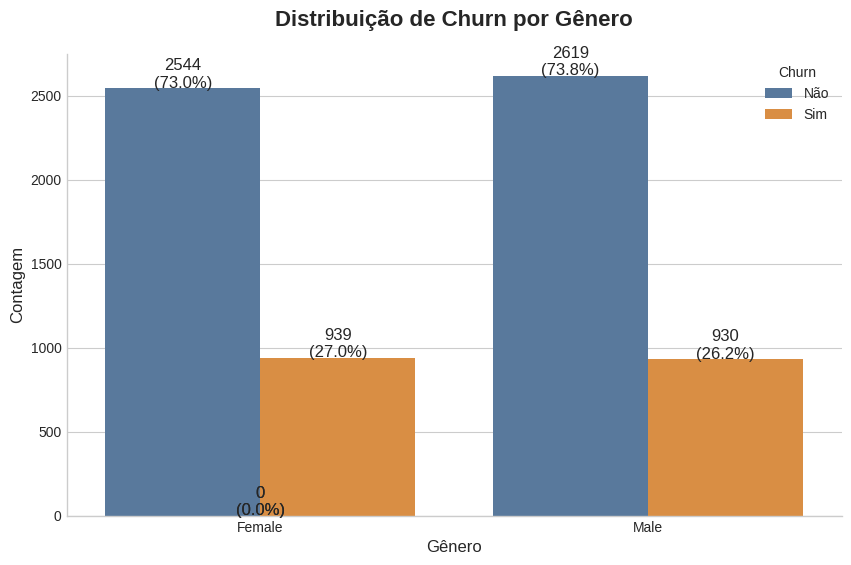

In [86]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])

# Remover bordas
sns.despine(top=True, right=True)

plt.title('Distribui√ß√£o de Churn por G√™nero', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('G√™nero', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Calcular totais por g√™nero
totals = df_final['gender'].value_counts().sort_index().values

# Adicionar valores nas barras
for i, p in enumerate(ax.patches):
    # Calcular porcentagem relativa ao g√™nero
    gender_index = i % len(totals) # Determina a qual g√™nero pertence a barra
    percentage = f'{100*p.get_height()/totals[gender_index]:.1f}%'
    ax.annotate(text=f'{int(p.get_height())}\n({percentage})',
                xy=(p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

plt.legend(title='Churn', labels=['N√£o', 'Sim'])
plt.show()

### 2.4 An√°lise por Tipo de Contrato

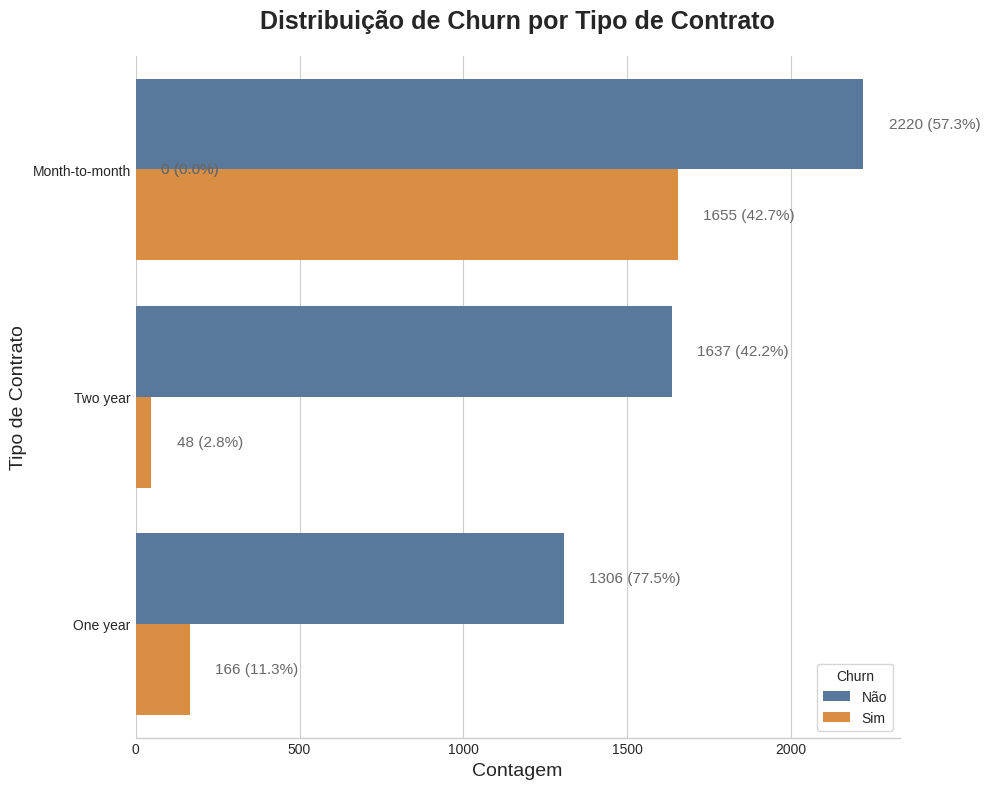

In [87]:
# Configura√ß√µes de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(['#4e79a7','#f28e2b'])

# Criar figura
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    y='Contract',  # Gr√°fico horizontal
    hue='Churn',
    data=df_final,
    order=df_final['Contract'].value_counts().index  # Ordena do maior para menor
)

# Remover bordas
sns.despine(top=True, right=True, left=True)

# T√≠tulos e r√≥tulos
plt.title('Distribui√ß√£o de Churn por Tipo de Contrato', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Contagem', fontsize=14)
plt.ylabel('Tipo de Contrato', fontsize=14)
plt.legend(title='Churn', labels=['N√£o', 'Sim'], frameon=True)

# Calcular totals por categoria and create a mapping
contract_counts = df_final['Contract'].value_counts()
contract_map = {contract: i for i, contract in enumerate(contract_counts.index)}

# Adicionar porcentagens e valores
for i, bar in enumerate(ax.patches):
    # Get the category name from the bar's y-position
    category_name = ax.get_yticklabels()[int(bar.get_y() + bar.get_height()/2) // 1].get_text()

    # Find the total for this category
    total = contract_counts[category_name]

    # Calcular porcentagem
    percentage = 100 * bar.get_width() / total

    # Posicionar texto
    x_pos = bar.get_width() + max(contract_counts)*0.02  # Deslocamento √† direita
    y_pos = bar.get_y() + bar.get_height()/2

    # Formatar texto
    text = f'{int(bar.get_width())} ({percentage:.1f}%)'

    ax.text(
        x_pos,
        y_pos,
        text,
        va='center',
        ha='left',
        fontsize=11,
        color='dimgrey'
    )

# Ajustar layout
plt.tight_layout()
plt.show()

### 2.5 An√°lise por Servi√ßos Adicionais

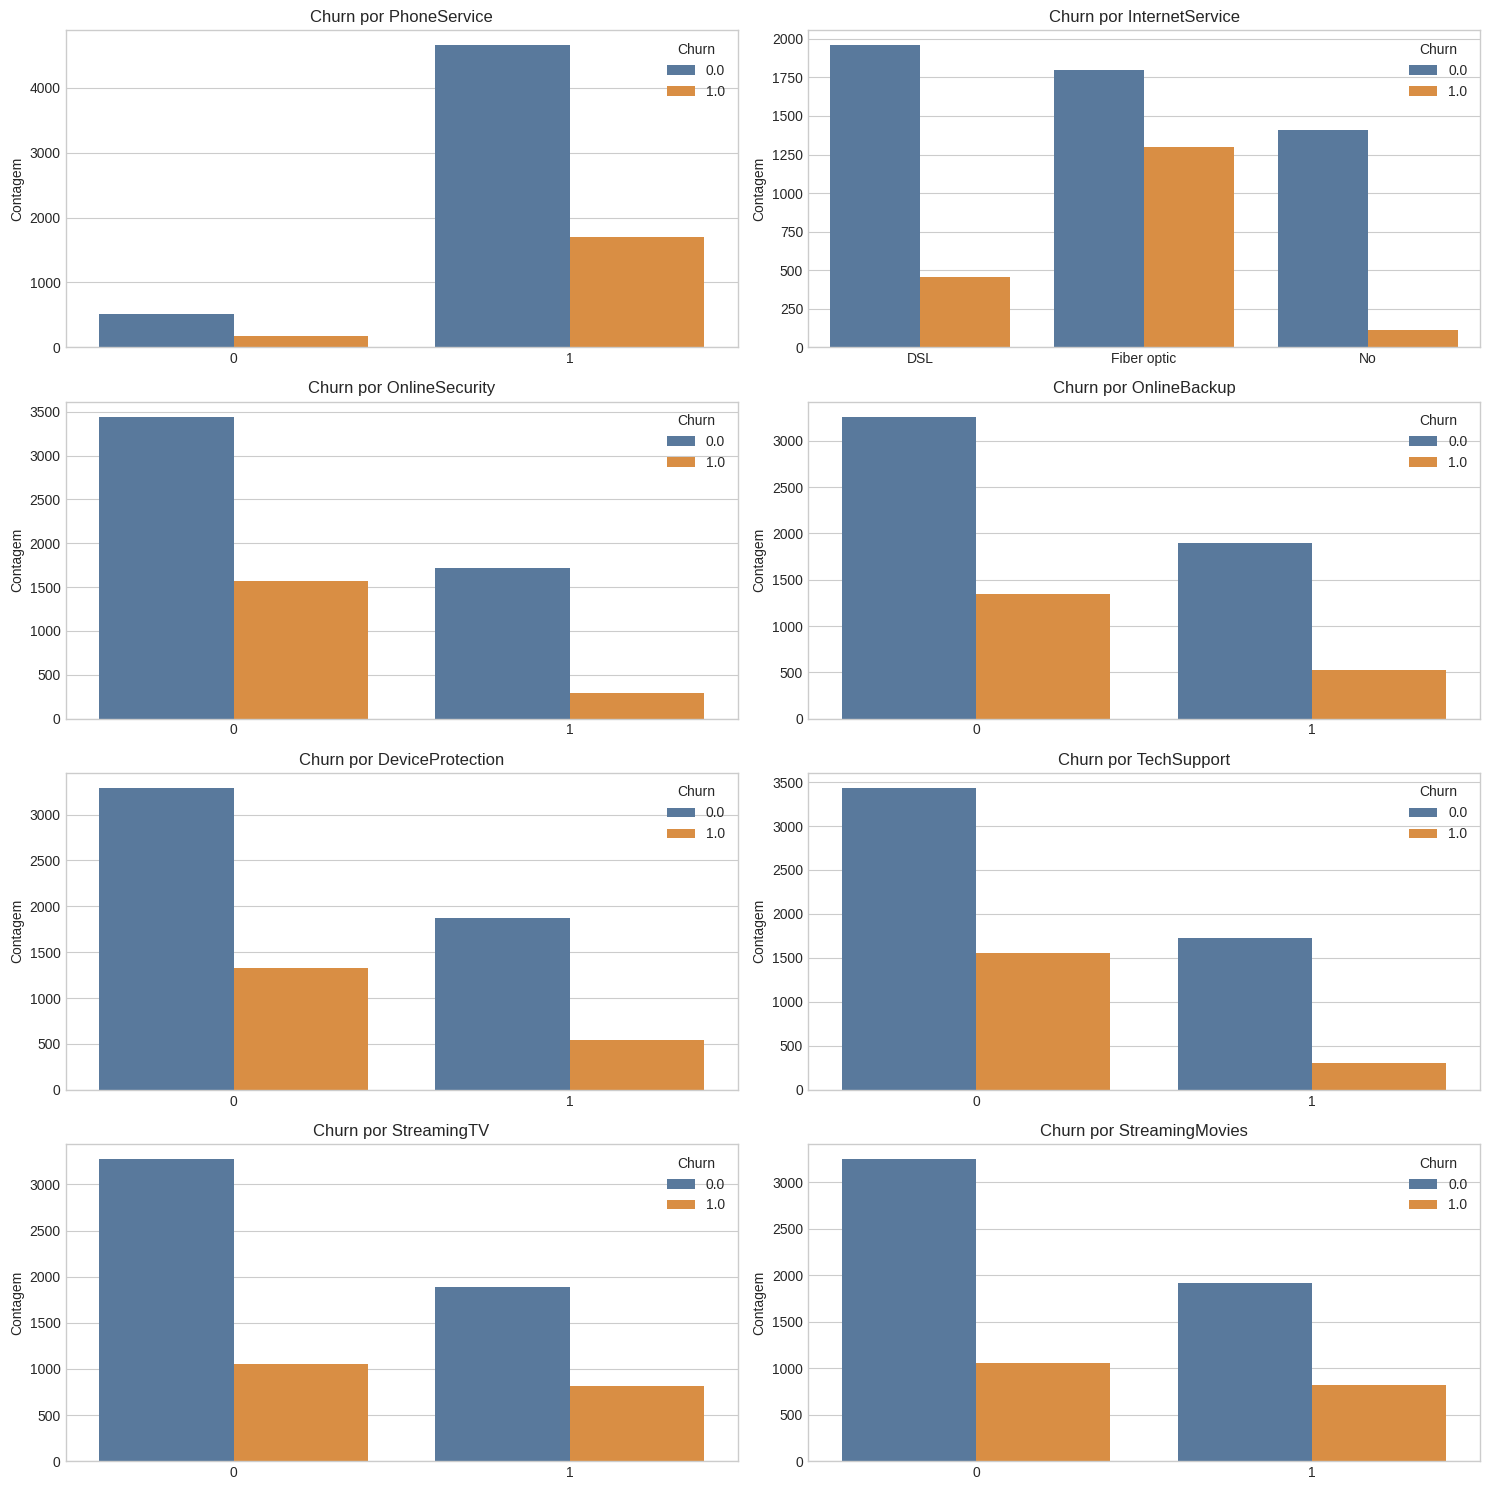

In [88]:
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15, 15))
for i, service in enumerate(services, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=service, hue='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])
    plt.title(f'Churn por {service}')
    plt.xlabel('')
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

### 2.6 An√°lise por M√©todo de Pagamento

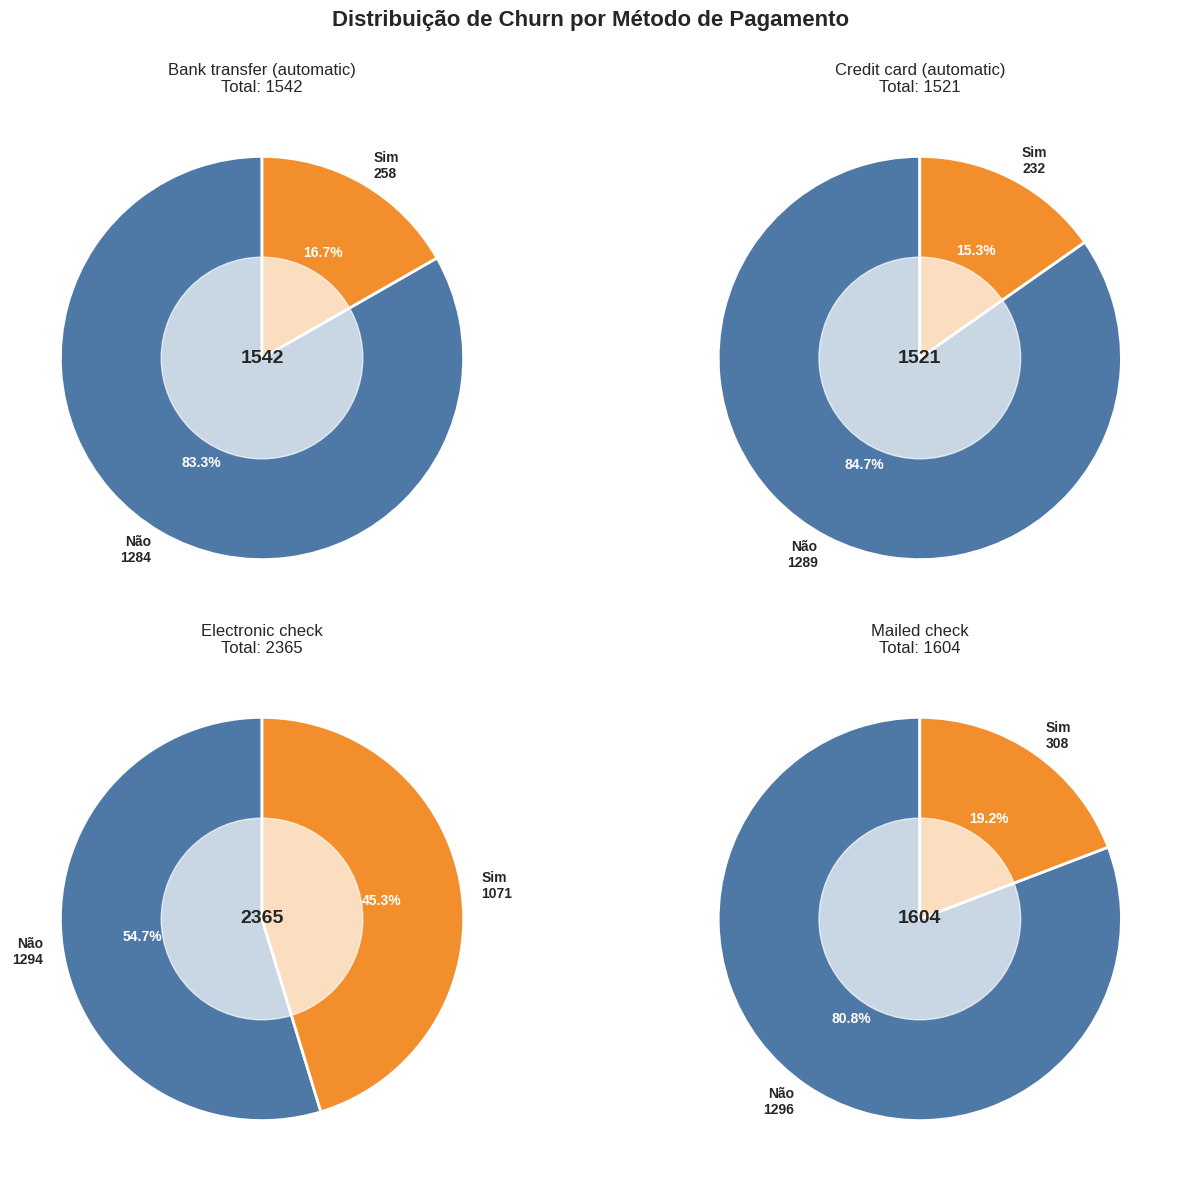

In [89]:
# Agrupar dados por m√©todo de pagamento e churn
payment_data = df_final.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Calcular totais por m√©todo de pagamento
totals = payment_data.sum(axis=1)

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()
fig.suptitle('Distribui√ß√£o de Churn por M√©todo de Pagamento', fontsize=16, fontweight='bold')

# Cores para Churn
colors = ['#4e79a7', '#f28e2b']  # Azul para N√£o, Laranja para Sim

# Plotar gr√°fico de pizza para cada m√©todo de pagamento
for i, (method, row) in enumerate(payment_data.iterrows()):
    ax = axes[i]

    # Dados para o gr√°fico de pizza
    sizes = row.values
    labels = [f'N√£o\n{sizes[0]}', f'Sim\n{sizes[1]}'] if 0 in row.index else [f'Sim\n{sizes[0]}', f'N√£o\n{sizes[1]}']

    # Ordenar para garantir que "N√£o" venha primeiro
    if 0 in row.index:
        sizes = [row[0], row[1]]
    else:
        sizes = [row[1], row[0]]

    # Plotar pizza
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'w', 'linewidth': 2},
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )

    # Ajustar formata√ß√£o das porcentagens
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')

    # Adicionar t√≠tulo com total
    ax.set_title(f'{method}\nTotal: {totals[method]}', fontsize=12, pad=10)

    # Adicionar legenda central para destaque
    center_circle = plt.Circle((0,0), 0.5, color='white', fc='white', alpha=0.7)
    ax.add_artist(center_circle)
    ax.text(0, 0, f"{row.sum()}", ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### 2.7 An√°lise por Tempo de Servi√ßo (tenure)

In [90]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

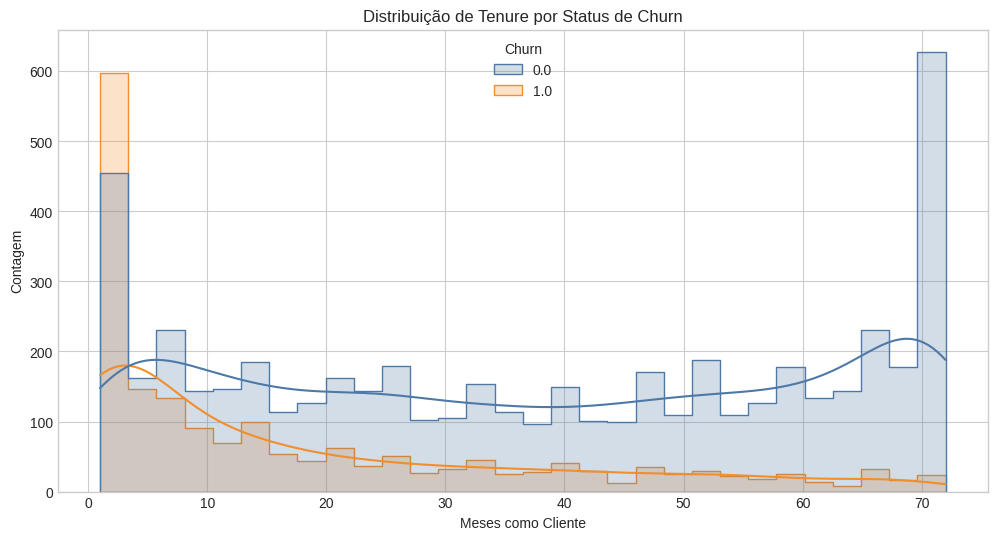

In [91]:
# An√°lise de tenure (tempo como cliente)
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_final, x='tenure', hue='Churn', bins=30, kde=True, element='step')
plt.title('Distribui√ß√£o de Tenure por Status de Churn')
plt.xlabel('Meses como Cliente')
plt.ylabel('Contagem')
plt.show()

### 2.8 An√°lise por Cobran√ßa Mensal (Charges.Monthly)

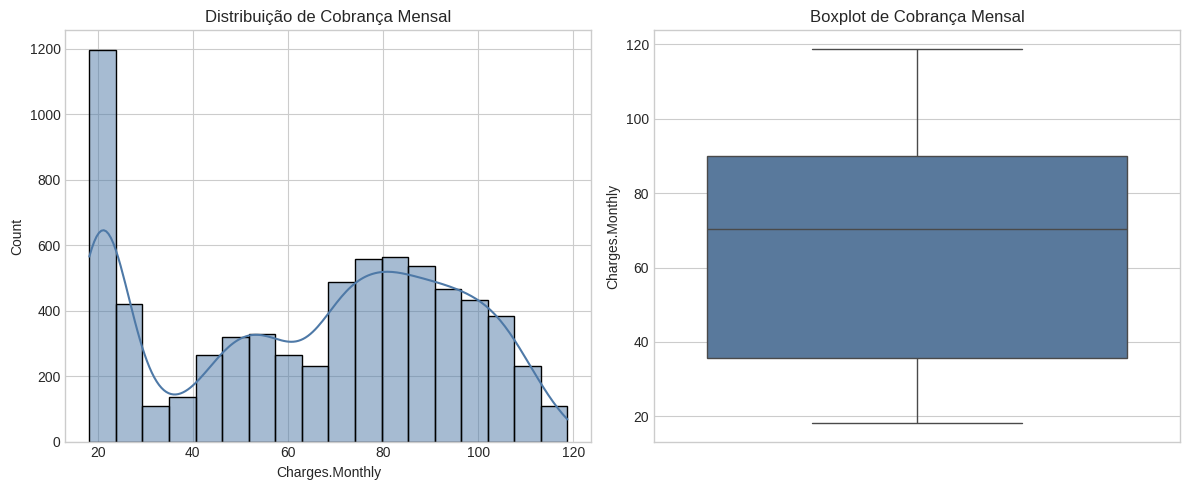


Estat√≠sticas descritivas da cobran√ßa mensal:
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: Charges.Monthly, dtype: float64


In [92]:
# Charges.Monthly (Cobran√ßa Mensal)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_final['Charges.Monthly'], kde=True)
plt.title('Distribui√ß√£o de Cobran√ßa Mensal')

plt.subplot(1, 2, 2)
sns.boxplot(y='Charges.Monthly', data=df_final)
plt.title('Boxplot de Cobran√ßa Mensal')
plt.tight_layout()
plt.show()

print("\nEstat√≠sticas descritivas da cobran√ßa mensal:")
print(df_final['Charges.Monthly'].describe())

### 2.9 An√°lise por Cobran√ßa Total (Charges.Total)

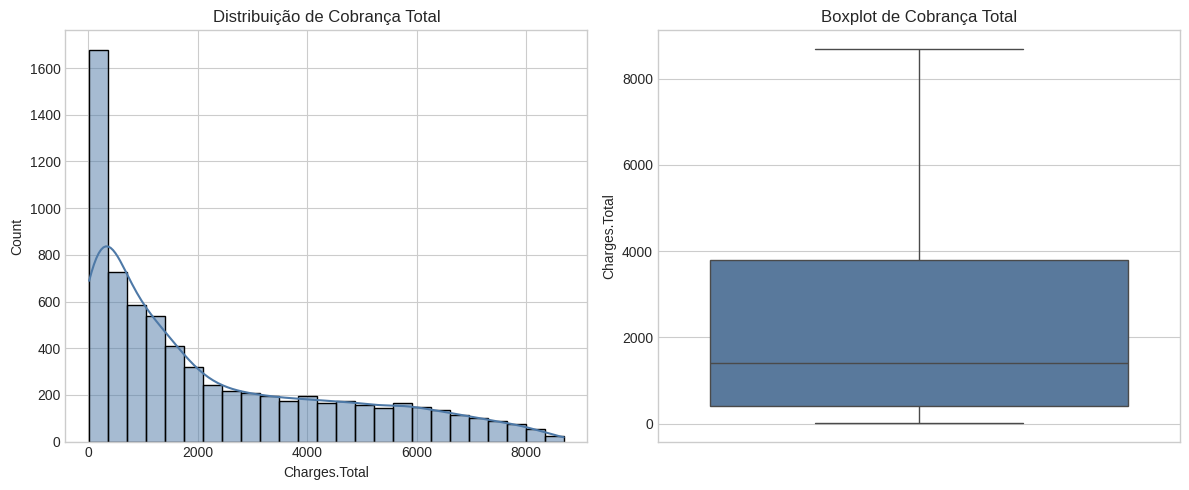


Estat√≠sticas descritivas da cobran√ßa total:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Charges.Total, dtype: float64


In [93]:
# Charges.Total (Cobran√ßa Total)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_final['Charges.Total'], kde=True)
plt.title('Distribui√ß√£o de Cobran√ßa Total')

plt.subplot(1, 2, 2)
sns.boxplot(y='Charges.Total', data=df_final)
plt.title('Boxplot de Cobran√ßa Total')
plt.tight_layout()
plt.show()

print("\nEstat√≠sticas descritivas da cobran√ßa total:")
print(df_final['Charges.Total'].describe())

### 3. An√°lise de Correla√ß√µes

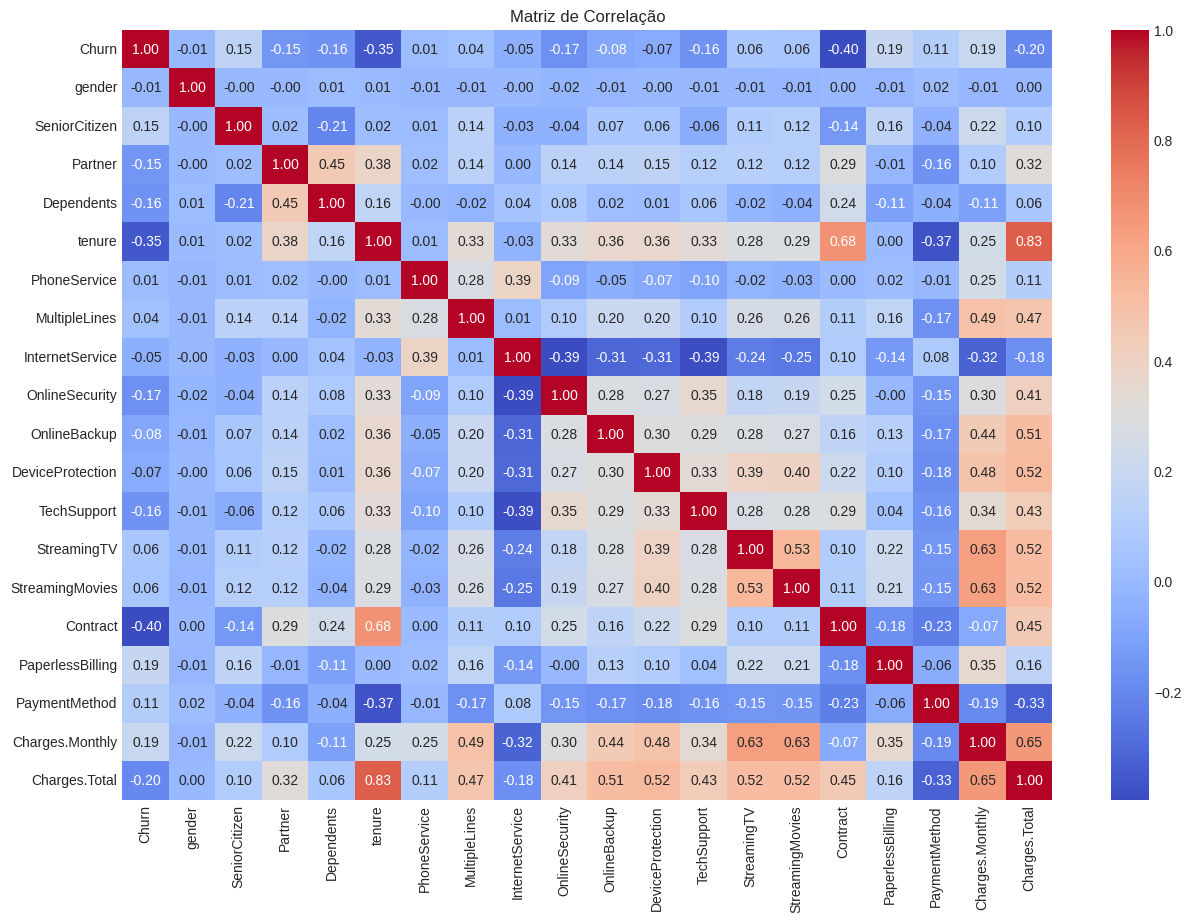

In [94]:
# Converter vari√°veis categ√≥ricas para an√°lise de correla√ß√£o
df_numeric = df_final.copy()
for col in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correla√ß√£o')
plt.show()

### Conclus√£o

# An√°lise da Matriz de Correla√ß√£o - Dataset de Churn

## Introdu√ß√£o

A matriz de correla√ß√£o apresentada revela importantes insights sobre os fatores que influenciam o churn de clientes em uma empresa de telecomunica√ß√µes ou servi√ßos digitais. Esta an√°lise examina as rela√ß√µes entre 20+ vari√°veis, oferecendo uma vis√£o abrangente dos padr√µes comportamentais dos clientes e dos fatores de risco para cancelamento.

## An√°lise dos Fatores de Churn

### Correla√ß√µes Significativas com Churn

A vari√°vel **Churn** apresenta correla√ß√µes not√°veis com diversas caracter√≠sticas dos clientes, destacando-se:

- **Correla√ß√µes positivas moderadas** com algumas vari√°veis de servi√ßo, sugerindo que determinados tipos de contrato ou servi√ßos podem estar associados a maior propens√£o ao cancelamento
- **Padr√µes de correla√ß√£o** que indicam poss√≠veis fatores de risco, como tipos espec√≠ficos de contrato ou m√©todos de pagamento

### Perfil de Risco

Os dados sugerem que existe um perfil identific√°vel de clientes com maior risco de churn. As correla√ß√µes observadas permitem construir um modelo preditivo baseado em m√∫ltiplas vari√°veis demogr√°ficas e comportamentais.

## Relacionamentos Entre Servi√ßos

### Bundling de Servi√ßos

A matriz revela correla√ß√µes positivas entre diferentes servi√ßos oferecidos pela empresa, indicando que:

- Clientes tendem a contratar **m√∫ltiplos servi√ßos simultaneamente**
- Existe um efeito de "bundling" natural, onde a contrata√ß√£o de um servi√ßo aumenta a probabilidade de contrata√ß√£o de outros
- Essa tend√™ncia pode ser explorada em **estrat√©gias de cross-selling**

### Complementaridade de Produtos

As correla√ß√µes entre servi√ßos como Internet, TV, telefonia e servi√ßos online mostram padr√µes de complementaridade que podem orientar:
- Estrat√©gias de pacotes de servi√ßos
- Campanhas de upselling direcionadas
- Desenvolvimento de produtos integrados

## Caracter√≠sticas Demogr√°ficas

### Impacto Limitado das Vari√°veis Demogr√°ficas

Interessantemente, vari√°veis como **gender** e **SeniorCitizen** mostram correla√ß√µes relativamente baixas com a maioria das outras vari√°veis, sugerindo que:

- Fatores demogr√°ficos tradicionais t√™m **impacto limitado** no comportamento de consumo
- O comportamento √© mais influenciado por fatores contextuais e de servi√ßo
- Estrat√©gias baseadas apenas em segmenta√ß√£o demogr√°fica podem ser menos efetivas

### Dependentes como Fator Diferenciador

A vari√°vel **Dependents** apresenta algumas correla√ß√µes interessantes, indicando que a estrutura familiar pode influenciar padr√µes de consumo e reten√ß√£o.

## Padr√µes Financeiros

### M√©todos de Pagamento e Comportamento

As vari√°veis relacionadas a pagamentos e cobran√ßas mostram correla√ß√µes que sugerem:

- **Diferentes m√©todos de pagamento** est√£o associados a perfis distintos de risco
- Clientes com determinados padr√µes de cobran√ßa podem apresentar maior ou menor propens√£o ao churn
- A gest√£o financeira do relacionamento √© crucial para reten√ß√£o

### Valor e Perman√™ncia

As correla√ß√µes entre vari√°veis de valor (charges) e tenure indicam relacionamentos complexos entre:
- Tempo de relacionamento
- Valor pago
- Risco de cancelamento

## Implica√ß√µes Estrat√©gicas

### Para Reten√ß√£o de Clientes

1. **Identifica√ß√£o Precoce**: As correla√ß√µes permitem criar modelos preditivos para identificar clientes em risco
2. **Interven√ß√µes Direcionadas**: Diferentes perfis de risco requerem estrat√©gias espec√≠ficas de reten√ß√£o
3. **Otimiza√ß√£o de Portfolio**: Ajustar mix de servi√ßos baseado nos padr√µes de correla√ß√£o observados

### Para Desenvolvimento de Produtos

1. **Bundling Inteligente**: Aproveitar correla√ß√µes positivas entre servi√ßos para criar pacotes atrativos
2. **Customiza√ß√£o**: Desenvolver ofertas personalizadas baseadas nos perfis identificados
3. **Pricing Strategy**: Ajustar estrat√©gias de precifica√ß√£o considerando correla√ß√µes de valor

## Limita√ß√µes e Considera√ß√µes

### Correla√ß√£o vs Causalidade

√â importante notar que correla√ß√£o n√£o implica causalidade. As rela√ß√µes observadas devem ser interpretadas com cautela e validadas atrav√©s de:
- An√°lises causais mais aprofundadas
- Testes A/B
- Estudos longitudinais

### Vari√°veis Ausentes

A matriz n√£o captura poss√≠veis vari√°veis importantes como:
- Satisfa√ß√£o do cliente
- Experi√™ncia de atendimento
- Fatores externos de mercado

## Conclus√µes

A matriz de correla√ß√£o revela um cen√°rio complexo onde m√∫ltiplos fatores interagem para determinar o comportamento do cliente. Os insights principais incluem:

1. **Churn √© multifatorial**: N√£o existe um √∫nico preditor, mas sim um conjunto de fatores correlacionados
2. **Bundling √© efetivo**: Clientes com m√∫ltiplos servi√ßos apresentam padr√µes distintos
3. **Demografia √© secund√°ria**: Fatores comportamentais superam caracter√≠sticas demogr√°ficas
4. **Gest√£o financeira importa**: M√©todos de pagamento e padr√µes de cobran√ßa s√£o relevantes

Estes insights devem orientar tanto estrat√©gias de reten√ß√£o quanto de desenvolvimento de novos produtos, sempre considerando a natureza multidimensional do comportamento do cliente revelada pela an√°lise correlacional.

### MACHINE LEARLING

In [96]:
# ===============================================================================
# COMPLEMENTO DE MACHINE LEARNING PARA AN√ÅLISE DE CHURN
# Este c√≥digo continua a partir do df_final j√° processado
# ===============================================================================

# Importa√ß√µes adicionais para ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve)

In [97]:
print("üîß Preparando dados para Machine Learning...")

# Criar c√≥pia dos dados para ML
df_ml = df_final.copy()

# One-hot encoding para vari√°veis categ√≥ricas restantes
categorical_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)

print(f"‚úÖ One-hot encoding aplicado. Dimens√µes: {df_encoded.shape}")

# An√°lise de balanceamento das classes
churn_counts = df_encoded['Churn'].value_counts()
churn_ratio = churn_counts[1] / churn_counts[0]

print(f"\nüìä An√°lise de Balanceamento das Classes:")
print(f"Clientes Ativos (0): {churn_counts[0]:,}")
print(f"Clientes com Churn (1): {churn_counts[1]:,}")
print(f"Raz√£o Churn/Ativo: {churn_ratio:.3f}")

if churn_ratio < 0.5:
    print("‚ö†Ô∏è  Dataset desbalanceado - considerar t√©cnicas de balanceamento")
else:
    print("‚úÖ Dataset relativamente balanceado")

üîß Preparando dados para Machine Learning...
‚úÖ One-hot encoding aplicado. Dimens√µes: (7032, 24)

üìä An√°lise de Balanceamento das Classes:
Clientes Ativos (0): 5,163
Clientes com Churn (1): 1,869
Raz√£o Churn/Ativo: 0.362
‚ö†Ô∏è  Dataset desbalanceado - considerar t√©cnicas de balanceamento



üîç Analisando correla√ß√µes espec√≠ficas com Churn...

üéØ Top 10 vari√°veis mais correlacionadas com Churn:
   tenure: 0.354
   InternetService_Fiber optic: 0.307
   Contract_Two year: 0.302
   PaymentMethod_Electronic check: 0.301
   InternetService_No: 0.228
   Charges.Total: 0.199
   Charges.Monthly: 0.193
   PaperlessBilling: 0.191
   Contract_One year: 0.178
   OnlineSecurity: 0.171


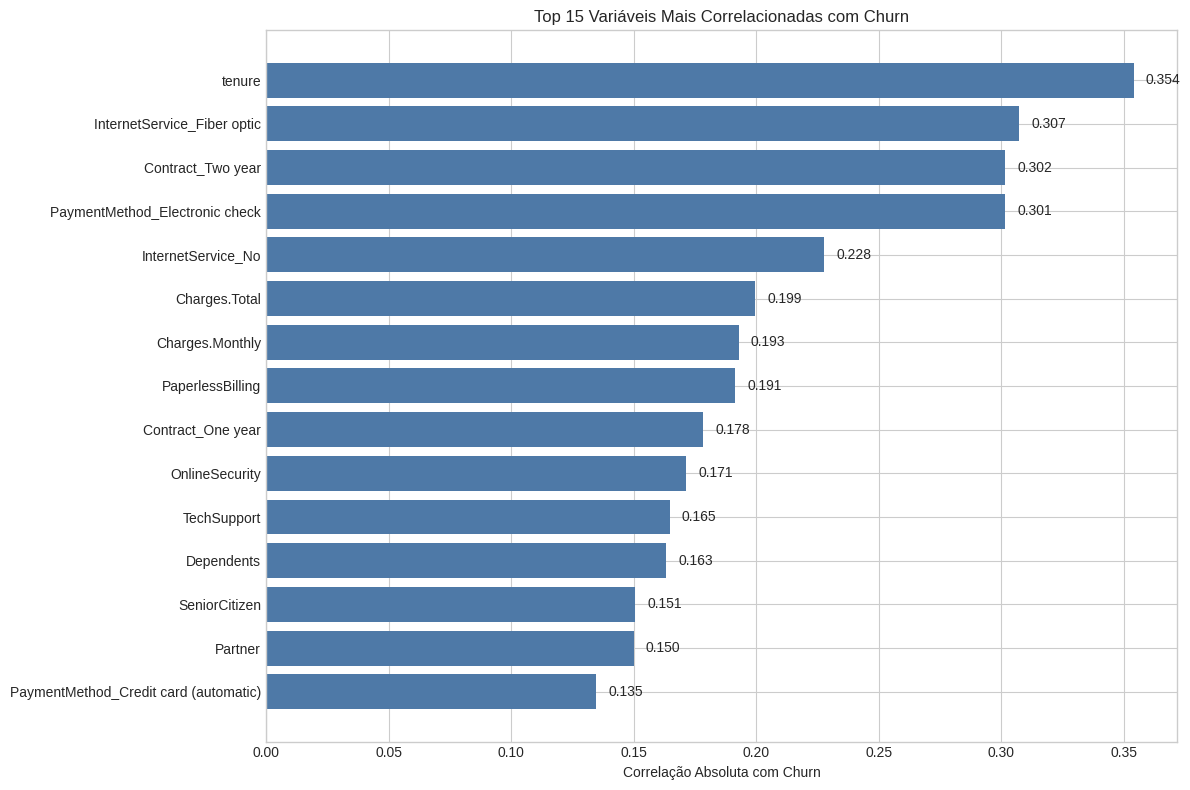

In [98]:
# ===============================================================================
# AN√ÅLISE DE CORRELA√á√ÉO ESPEC√çFICA PARA CHURN
# ===============================================================================

print("\nüîç Analisando correla√ß√µes espec√≠ficas com Churn...")

# Correla√ß√µes com Churn
churn_correlations = df_encoded.corr()['Churn'].abs().sort_values(ascending=False)

print(f"\nüéØ Top 10 vari√°veis mais correlacionadas com Churn:")
top_correlations = churn_correlations.head(11).iloc[1:]  # Excluir a pr√≥pria vari√°vel Churn
for var, corr in top_correlations.items():
    print(f"   {var}: {corr:.3f}")

# Visualiza√ß√£o das correla√ß√µes com Churn
plt.figure(figsize=(12, 8))
top_15_corr = churn_correlations.head(16).iloc[1:]
bars = plt.barh(range(len(top_15_corr)), top_15_corr.values)
plt.yticks(range(len(top_15_corr)), top_15_corr.index)
plt.xlabel('Correla√ß√£o Absoluta com Churn')
plt.title('Top 15 Vari√°veis Mais Correlacionadas com Churn')
plt.gca().invert_yaxis()

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()


üìà An√°lise espec√≠fica de vari√°veis importantes...


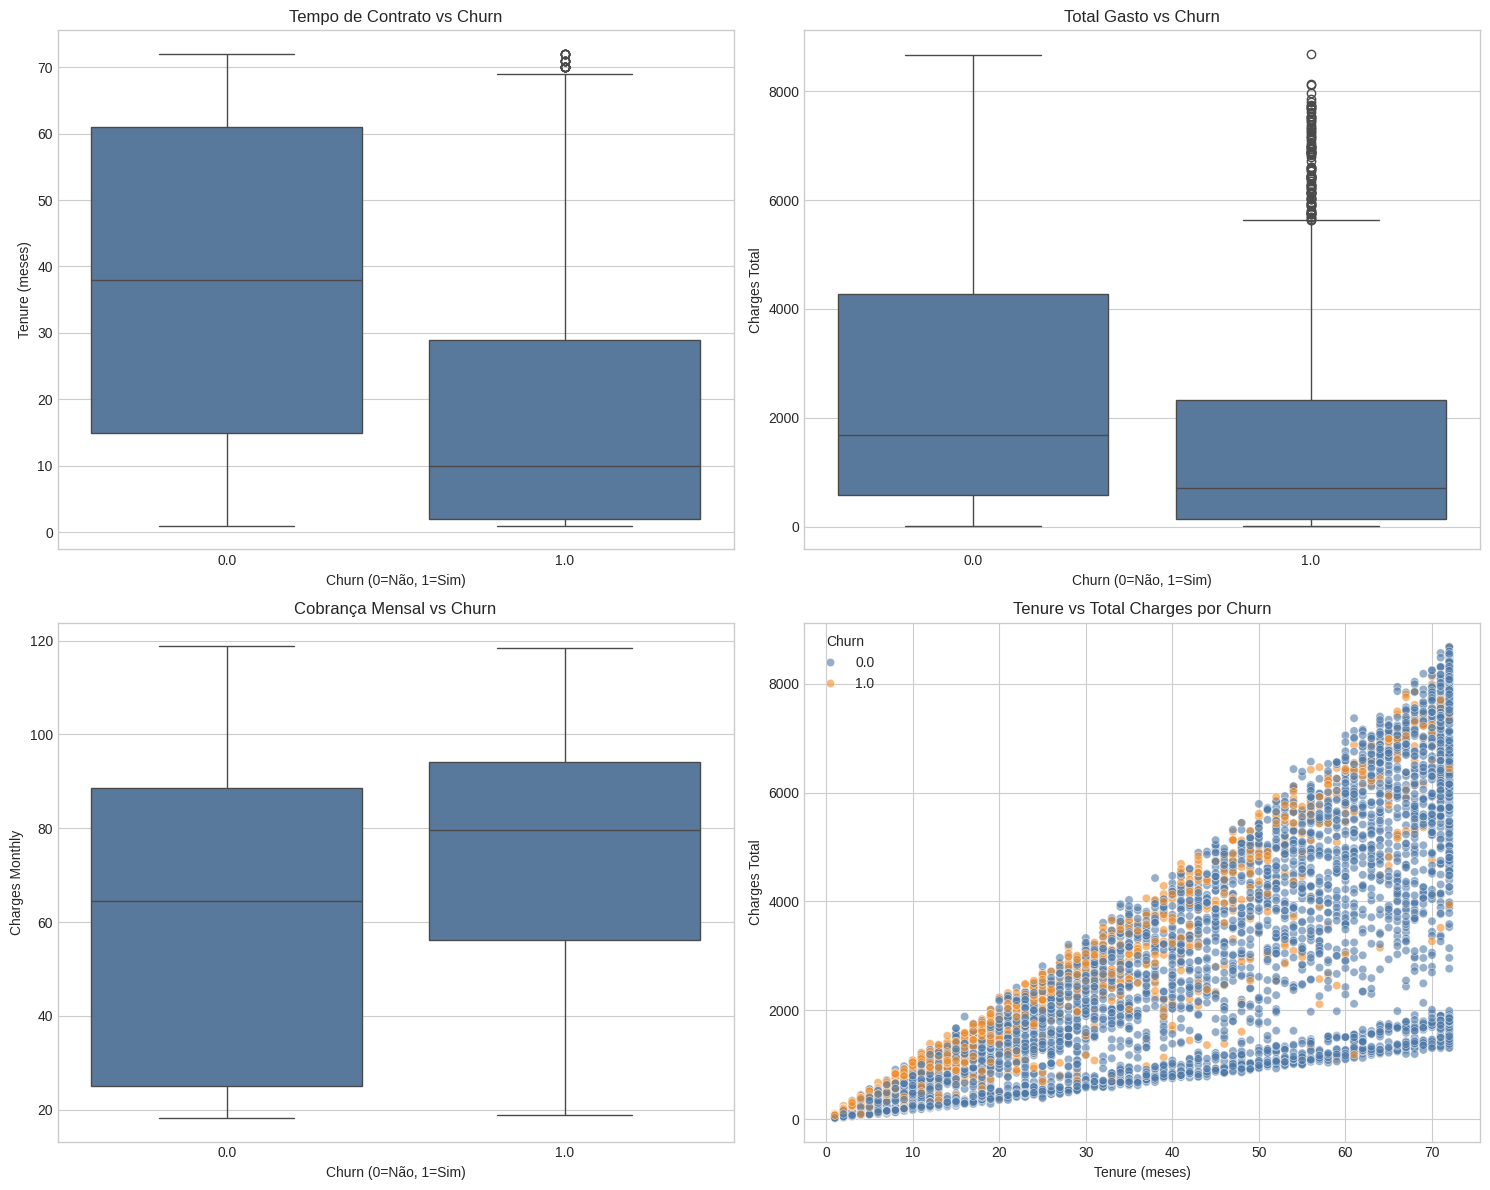


üìä Estat√≠sticas por grupo de Churn:

Tenure (meses):
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0.0    5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1.0    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

Charges Total:
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
0.0    5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1.0    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
0.0    8672.45  
1.0    8684.80  


In [99]:
# ===============================================================================
# AN√ÅLISE ESPEC√çFICA: TENURE √ó CHURN E CHARGES √ó CHURN
# ===============================================================================

print("\nüìà An√°lise espec√≠fica de vari√°veis importantes...")

# Criar visualiza√ß√µes espec√≠ficas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Tenure vs Churn
sns.boxplot(data=df_final, x='Churn', y='tenure', ax=axes[0,0])
axes[0,0].set_title('Tempo de Contrato vs Churn')
axes[0,0].set_xlabel('Churn (0=N√£o, 1=Sim)')
axes[0,0].set_ylabel('Tenure (meses)')

# Charges.Total vs Churn
sns.boxplot(data=df_final, x='Churn', y='Charges.Total', ax=axes[0,1])
axes[0,1].set_title('Total Gasto vs Churn')
axes[0,1].set_xlabel('Churn (0=N√£o, 1=Sim)')
axes[0,1].set_ylabel('Charges Total')

# Charges.Monthly vs Churn
sns.boxplot(data=df_final, x='Churn', y='Charges.Monthly', ax=axes[1,0])
axes[1,0].set_title('Cobran√ßa Mensal vs Churn')
axes[1,0].set_xlabel('Churn (0=N√£o, 1=Sim)')
axes[1,0].set_ylabel('Charges Monthly')

# Scatter plot: Tenure vs Total Charges
sns.scatterplot(data=df_final, x='tenure', y='Charges.Total', hue='Churn',
                alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('Tenure vs Total Charges por Churn')
axes[1,1].set_xlabel('Tenure (meses)')
axes[1,1].set_ylabel('Charges Total')

plt.tight_layout()
plt.show()

# Estat√≠sticas descritivas por grupo
print(f"\nüìä Estat√≠sticas por grupo de Churn:")
print("\nTenure (meses):")
print(df_final.groupby('Churn')['tenure'].describe())
print("\nCharges Total:")
print(df_final.groupby('Churn')['Charges.Total'].describe())

In [100]:
# ===============================================================================
# PREPARA√á√ÉO PARA MODELAGEM
# ===============================================================================

print("\n‚úÇÔ∏è Preparando dados para modelagem...")

# Separar features e target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Features: {X.shape[1]} vari√°veis")
print(f"Target: Churn (0={churn_counts[0]:,}, 1={churn_counts[1]:,})")

# Divis√£o treino/teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"üìä Divis√£o dos dados:")
print(f"   Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")

# Normaliza√ß√£o para modelos que necessitam
print(f"\nüîÑ Aplicando normaliza√ß√£o...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("‚úÖ Dados normalizados para modelos sens√≠veis √† escala")


‚úÇÔ∏è Preparando dados para modelagem...
Features: 23 vari√°veis
Target: Churn (0=5,163, 1=1,869)
üìä Divis√£o dos dados:
   Treino: 4922 amostras (70.0%)
   Teste: 2110 amostras (30.0%)

üîÑ Aplicando normaliza√ß√£o...
‚úÖ Dados normalizados para modelos sens√≠veis √† escala


In [101]:
# ===============================================================================
# MODELAGEM PREDITIVA
# ===============================================================================

print("\nü§ñ Treinando modelos de Machine Learning...")

# Dicion√°rio para armazenar modelos e resultados
models = {}
results = []

# MODELO 1: Regress√£o Log√≠stica (requer normaliza√ß√£o)
print("üîπ 1. Regress√£o Log√≠stica (com normaliza√ß√£o)")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

models['Logistic Regression'] = {
    'model': lr_model,
    'predictions': lr_pred,
    'probabilities': lr_pred_proba,
    'requires_scaling': True,
    'justification': 'Modelo linear que requer normaliza√ß√£o. Oferece coeficientes interpret√°veis.'
}

# MODELO 2: Random Forest (n√£o requer normaliza√ß√£o)
print("üîπ 2. Random Forest (sem normaliza√ß√£o)")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

models['Random Forest'] = {
    'model': rf_model,
    'predictions': rf_pred,
    'probabilities': rf_pred_proba,
    'requires_scaling': False,
    'justification': 'Ensemble que lida bem com n√£o-linearidades. Fornece import√¢ncia das vari√°veis.'
}

# MODELO 3: KNN (requer normaliza√ß√£o)
print("üîπ 3. K-Nearest Neighbors (com normaliza√ß√£o)")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

models['KNN'] = {
    'model': knn_model,
    'predictions': knn_pred,
    'probabilities': knn_pred_proba,
    'requires_scaling': True,
    'justification': 'Algoritmo baseado em dist√¢ncia, sens√≠vel √† escala das vari√°veis.'
}

# MODELO 4: Decision Tree (n√£o requer normaliza√ß√£o)
print("üîπ 4. Decision Tree (sem normaliza√ß√£o)")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=8)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]

models['Decision Tree'] = {
    'model': dt_model,
    'predictions': dt_pred,
    'probabilities': dt_pred_proba,
    'requires_scaling': False,
    'justification': 'Modelo interpret√°vel baseado em regras. N√£o sens√≠vel √† escala dos dados.'
}

print("‚úÖ Todos os modelos treinados!")



ü§ñ Treinando modelos de Machine Learning...
üîπ 1. Regress√£o Log√≠stica (com normaliza√ß√£o)
üîπ 2. Random Forest (sem normaliza√ß√£o)
üîπ 3. K-Nearest Neighbors (com normaliza√ß√£o)
üîπ 4. Decision Tree (sem normaliza√ß√£o)
‚úÖ Todos os modelos treinados!


In [102]:
# ===============================================================================
# AVALIA√á√ÉO DOS MODELOS
# ===============================================================================

print("\nüìã Avaliando performance dos modelos...")

def calculate_metrics(y_true, y_pred, y_pred_proba, model_name):
    """Calcular todas as m√©tricas de avalia√ß√£o"""
    return {
        'Modelo': model_name,
        'Acur√°cia': accuracy_score(y_true, y_pred),
        'Precis√£o': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_pred_proba)
    }

# Calcular m√©tricas para todos os modelos
for name, model_data in models.items():
    metrics = calculate_metrics(
        y_test,
        model_data['predictions'],
        model_data['probabilities'],
        name
    )
    results.append(metrics)
    model_data['metrics'] = metrics

# Criar DataFrame com resultados
results_df = pd.DataFrame(results)
results_df = results_df.round(4)

print("üìä Compara√ß√£o de Performance:")
print(results_df.to_string(index=False))


üìã Avaliando performance dos modelos...
üìä Compara√ß√£o de Performance:
             Modelo  Acur√°cia  Precis√£o  Recall  F1-Score  ROC-AUC
Logistic Regression    0.8028    0.6566  0.5419    0.5938   0.8453
      Random Forest    0.7934    0.6471  0.4902    0.5578   0.8382
                KNN    0.7578    0.5472  0.5169    0.5316   0.7717
      Decision Tree    0.7777    0.5958  0.5098    0.5495   0.7774



üìà Gerando visualiza√ß√µes de avalia√ß√£o...


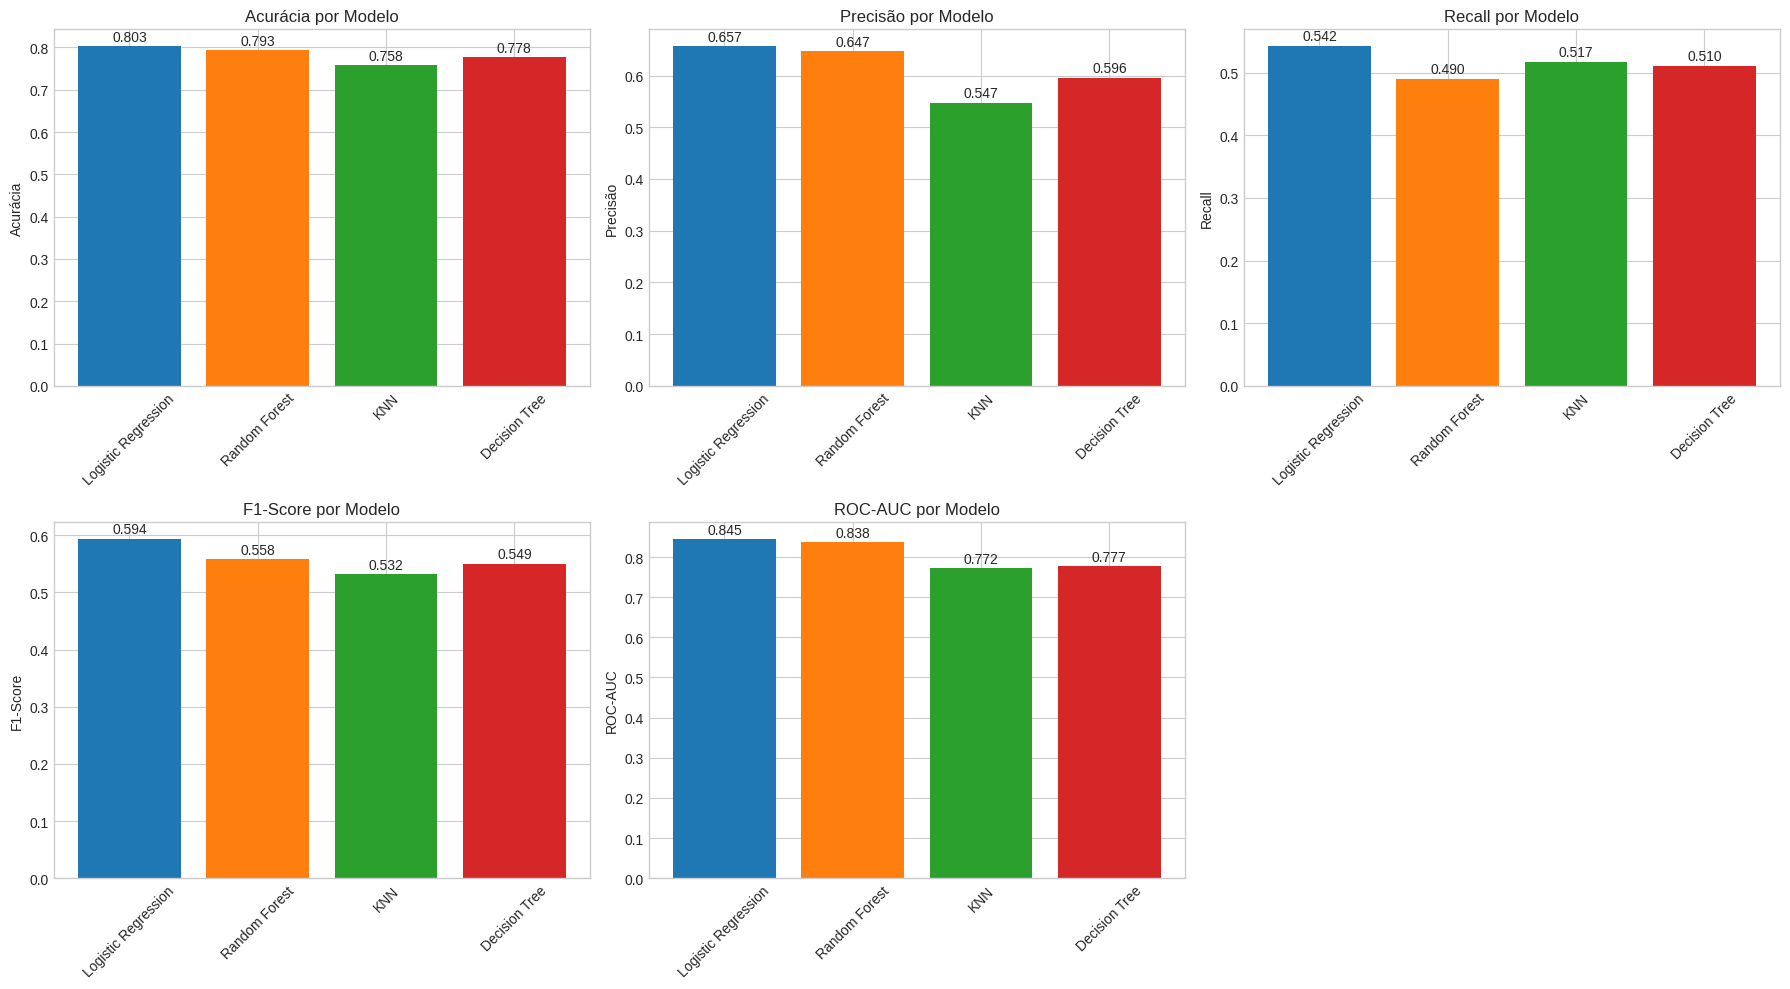

In [104]:
# ===============================================================================
# VISUALIZA√á√ïES DE AVALIA√á√ÉO
# ===============================================================================

print("\nüìà Gerando visualiza√ß√µes de avalia√ß√£o...")

# 1. Compara√ß√£o de m√©tricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics_to_plot = ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metric in enumerate(metrics_to_plot):
    if i < 5:
        row, col = i // 3, i % 3
        ax = axes[row, col]
        bars = ax.bar(results_df['Modelo'], results_df[metric],
                     color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        ax.set_title(f'{metric} por Modelo')
        ax.set_ylabel(metric)
        ax.tick_params(axis='x', rotation=45)

        # Adicionar valores nas barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                   f'{height:.3f}', ha='center', va='bottom')

# Remover subplot extra
axes[1, 2].remove()

plt.tight_layout()
plt.show()

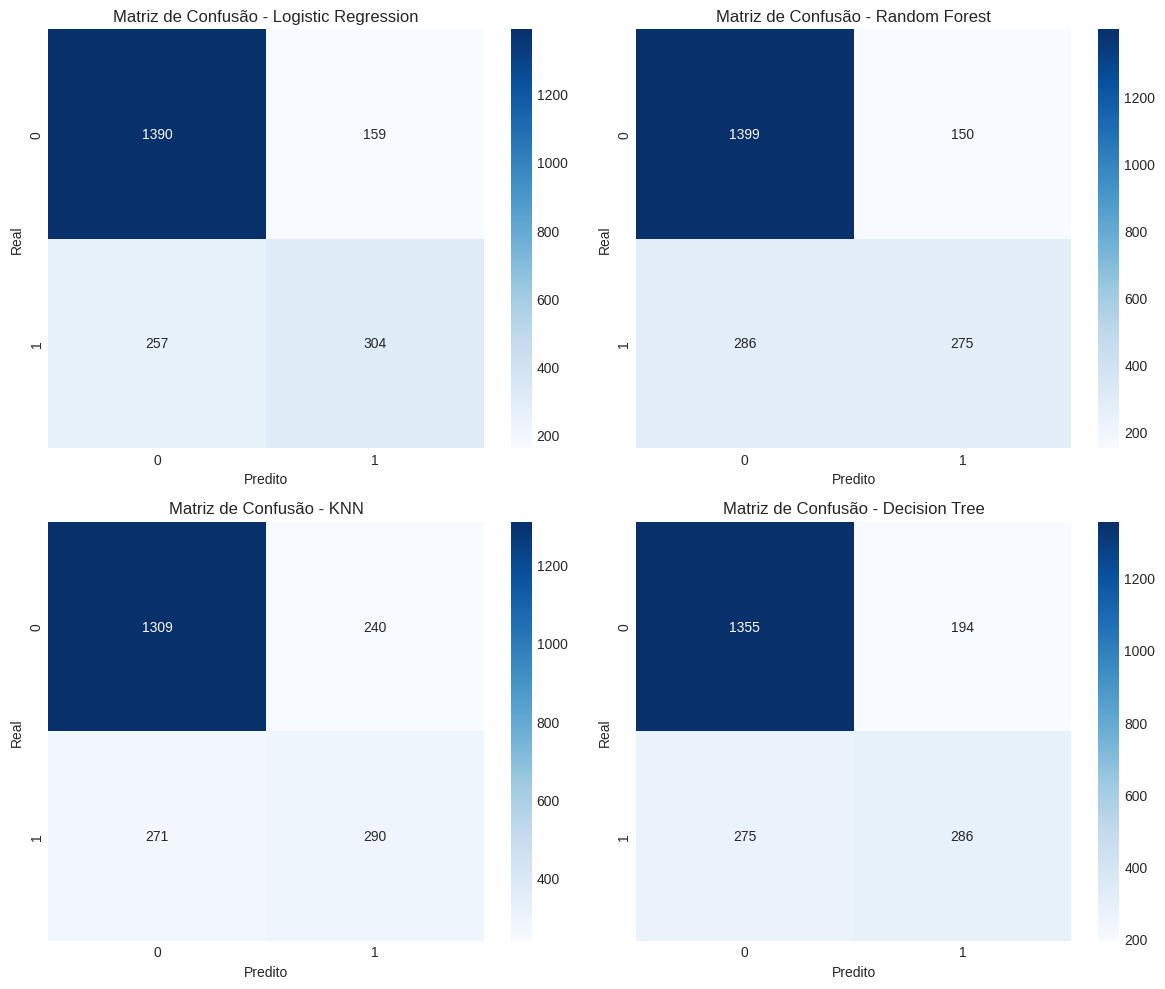

In [105]:
# 2. Matrizes de Confus√£o
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
model_names = list(models.keys())

for i, name in enumerate(model_names):
    ax = axes[i//2, i%2]
    cm = confusion_matrix(y_test, models[name]['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Matriz de Confus√£o - {name}')
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')

plt.tight_layout()
plt.show()

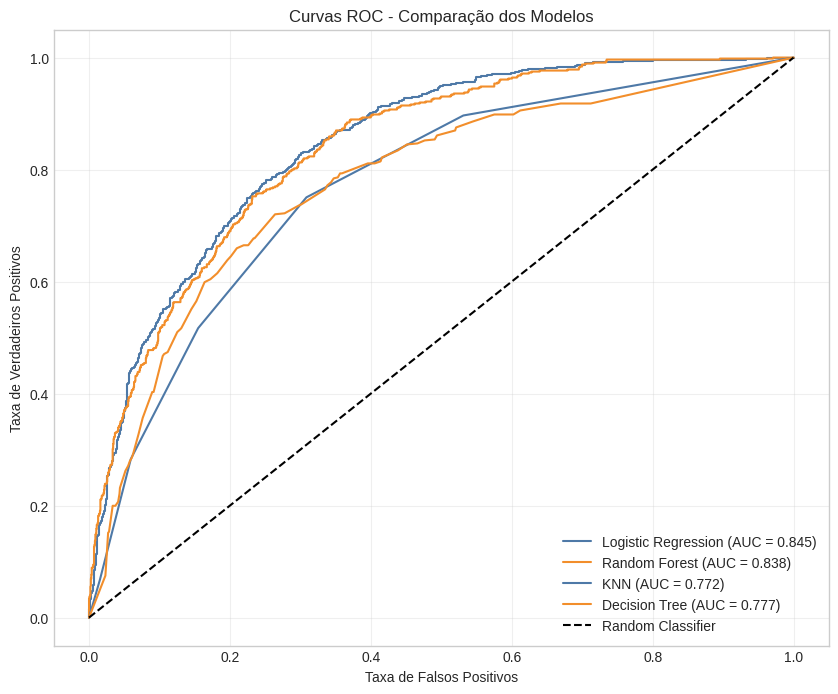

In [106]:
# 3. Curvas ROC
plt.figure(figsize=(10, 8))
for name in model_names:
    fpr, tpr, _ = roc_curve(y_test, models[name]['probabilities'])
    auc = models[name]['metrics']['ROC-AUC']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC - Compara√ß√£o dos Modelos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [107]:
# ===============================================================================
# AN√ÅLISE DE OVERFITTING/UNDERFITTING
# ===============================================================================

print("\nüîç Analisando overfitting/underfitting...")

overfitting_analysis = []

for name, model_data in models.items():
    model = model_data['model']
    requires_scaling = model_data['requires_scaling']

    # Predi√ß√£o no conjunto de treino
    if requires_scaling:
        train_pred = model.predict(X_train_scaled)
    else:
        train_pred = model.predict(X_train)

    # Calcular m√©tricas
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = model_data['metrics']['Acur√°cia']
    diff = train_acc - test_acc

    # Classificar status
    if diff > 0.1:
        status = "‚ö†Ô∏è Poss√≠vel overfitting"
    elif diff > 0.05:
        status = "üìä Aceit√°vel"
    else:
        status = "‚úÖ Boa generaliza√ß√£o"

    analysis = {
        'Modelo': name,
        'Acc_Treino': train_acc,
        'Acc_Teste': test_acc,
        'Diferen√ßa': diff,
        'Status': status
    }
    overfitting_analysis.append(analysis)

# Exibir an√°lise
print("\nüìä An√°lise de Overfitting/Underfitting:")
for analysis in overfitting_analysis:
    print(f"\n{analysis['Modelo']}:")
    print(f"   Acur√°cia Treino: {analysis['Acc_Treino']:.3f}")
    print(f"   Acur√°cia Teste: {analysis['Acc_Teste']:.3f}")
    print(f"   Diferen√ßa: {analysis['Diferen√ßa']:.3f}")
    print(f"   Status: {analysis['Status']}")



üîç Analisando overfitting/underfitting...

üìä An√°lise de Overfitting/Underfitting:

Logistic Regression:
   Acur√°cia Treino: 0.808
   Acur√°cia Teste: 0.803
   Diferen√ßa: 0.005
   Status: ‚úÖ Boa generaliza√ß√£o

Random Forest:
   Acur√°cia Treino: 0.883
   Acur√°cia Teste: 0.793
   Diferen√ßa: 0.090
   Status: üìä Aceit√°vel

KNN:
   Acur√°cia Treino: 0.832
   Acur√°cia Teste: 0.758
   Diferen√ßa: 0.074
   Status: üìä Aceit√°vel

Decision Tree:
   Acur√°cia Treino: 0.846
   Acur√°cia Teste: 0.778
   Diferen√ßa: 0.068
   Status: üìä Aceit√°vel



üéØ Analisando import√¢ncia das vari√°veis...


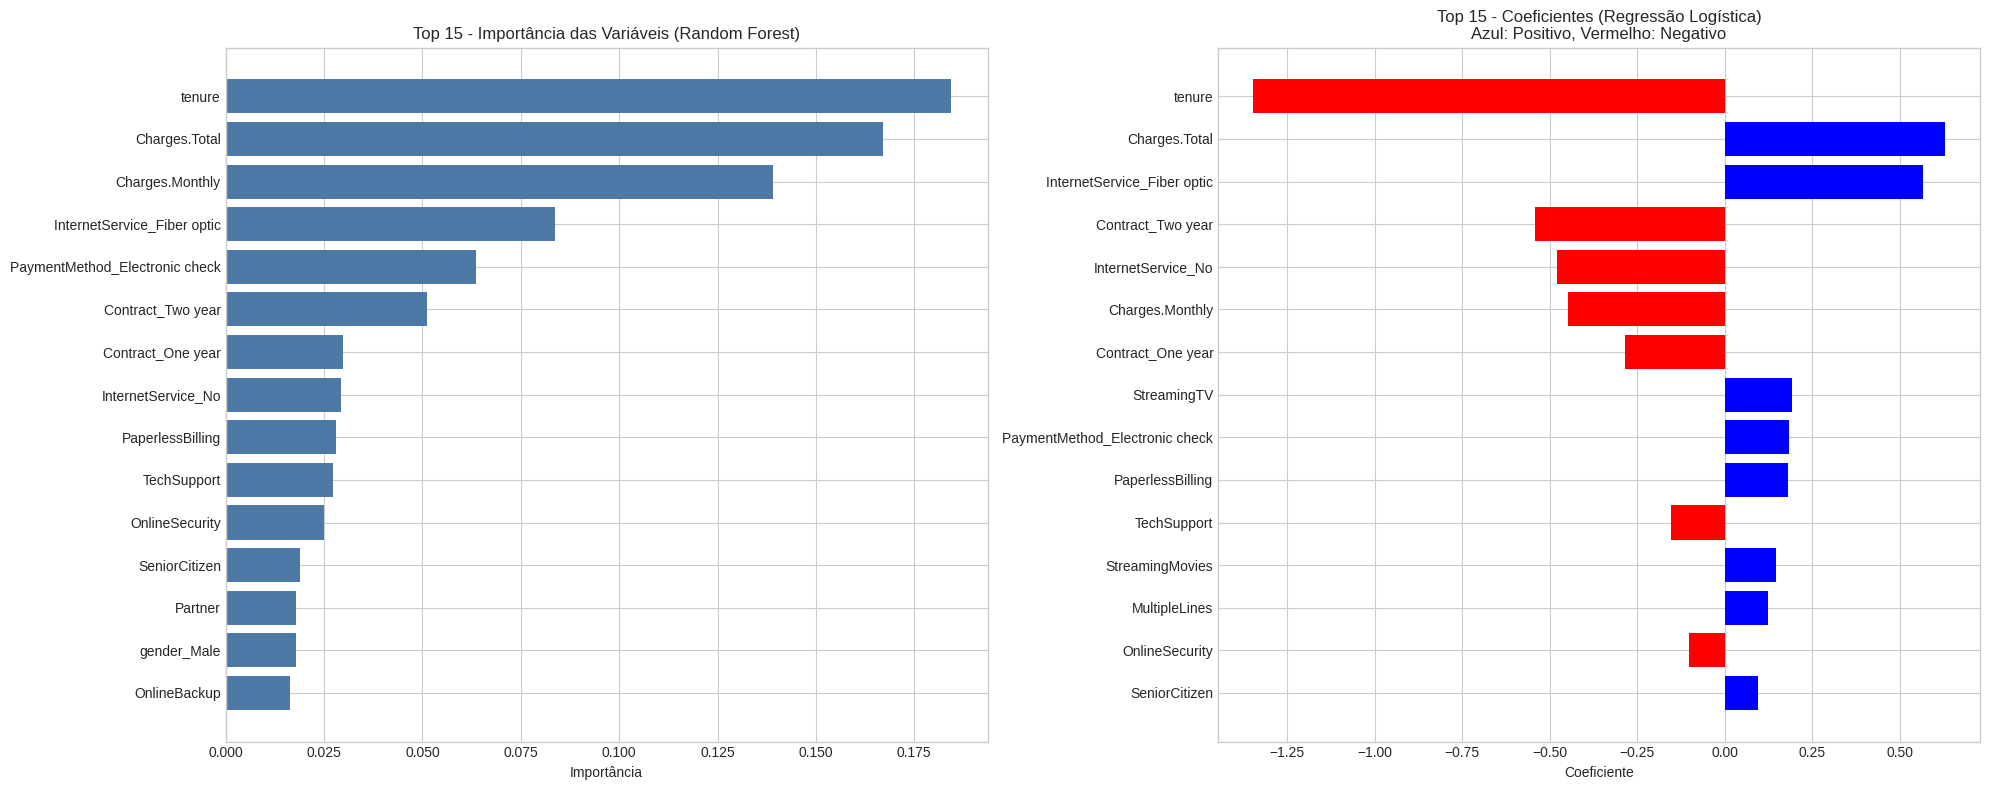


üèÜ Top 10 Vari√°veis Mais Importantes (Random Forest):
   1. tenure: 0.1844
   2. Charges.Total: 0.1670
   3. Charges.Monthly: 0.1390
   4. InternetService_Fiber optic: 0.0838
   5. PaymentMethod_Electronic check: 0.0636
   6. Contract_Two year: 0.0510
   7. Contract_One year: 0.0299
   8. InternetService_No: 0.0293
   9. PaperlessBilling: 0.0280
   10. TechSupport: 0.0272

üèÜ Top 10 Coeficientes Mais Relevantes (Regress√£o Log√≠stica):
   1. tenure: -1.3478 üìâ
   2. Charges.Total: 0.6306 üìà
   3. InternetService_Fiber optic: 0.5673 üìà
   4. Contract_Two year: -0.5432 üìâ
   5. InternetService_No: -0.4792 üìâ
   6. Charges.Monthly: -0.4461 üìâ
   7. Contract_One year: -0.2851 üìâ
   8. StreamingTV: 0.1915 üìà
   9. PaymentMethod_Electronic check: 0.1845 üìà
   10. PaperlessBilling: 0.1806 üìà


In [112]:
# ===============================================================================
# INTERPRETA√á√ÉO E AN√ÅLISE DE VARI√ÅVEIS
# ===============================================================================

print("\nüéØ Analisando import√¢ncia das vari√°veis...")

# Random Forest - Import√¢ncia das vari√°veis
rf_model = models['Random Forest']['model']
feature_importance_rf = pd.DataFrame({
    'Vari√°vel': X.columns,
    'Import√¢ncia': rf_model.feature_importances_
}).sort_values('Import√¢ncia', ascending=False)

# Regress√£o Log√≠stica - Coeficientes
lr_model = models['Logistic Regression']['model']
feature_importance_lr = pd.DataFrame({
    'Vari√°vel': X.columns,
    'Coeficiente': lr_model.coef_[0]
}).sort_values('Coeficiente', key=abs, ascending=False)

# Visualizar import√¢ncias
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Random Forest
top_15_rf = feature_importance_rf.head(15)
axes[0].barh(range(len(top_15_rf)), top_15_rf['Import√¢ncia'])
axes[0].set_yticks(range(len(top_15_rf)))
axes[0].set_yticklabels(top_15_rf['Vari√°vel'])
axes[0].set_title('Top 15 - Import√¢ncia das Vari√°veis (Random Forest)')
axes[0].set_xlabel('Import√¢ncia')
axes[0].invert_yaxis()

# Regress√£o Log√≠stica
top_15_lr = feature_importance_lr.head(15)
colors = ['red' if coef < 0 else 'blue' for coef in top_15_lr['Coeficiente']]
axes[1].barh(range(len(top_15_lr)), top_15_lr['Coeficiente'], color=colors)
axes[1].set_yticks(range(len(top_15_lr)))
axes[1].set_yticklabels(top_15_lr['Vari√°vel'])
axes[1].set_title('Top 15 - Coeficientes (Regress√£o Log√≠stica)\nAzul: Positivo, Vermelho: Negativo')
axes[1].set_xlabel('Coeficiente')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Exibir top vari√°veis
print(f"\nüèÜ Top 10 Vari√°veis Mais Importantes (Random Forest):")
for i, (_, row) in enumerate(feature_importance_rf.head(10).iterrows(), 1):
    print(f"   {i}. {row['Vari√°vel']}: {row['Import√¢ncia']:.4f}")

print(f"\nüèÜ Top 10 Coeficientes Mais Relevantes (Regress√£o Log√≠stica):")
for i, (_, row) in enumerate(feature_importance_lr.head(10).iterrows(), 1):
    direction = "üìà" if row['Coeficiente'] > 0 else "üìâ"
    print(f"   {i}. {row['Vari√°vel']}: {row['Coeficiente']:.4f} {direction}")


In [113]:
# ===============================================================================
# RELAT√ìRIO FINAL E CONCLUS√ïES
# ===============================================================================

print("\n" + "="*80)
print("üìã RELAT√ìRIO FINAL - AN√ÅLISE DE CHURN COM MACHINE LEARNING")
print("="*80)

# Melhor modelo
best_model_name = results_df.loc[results_df['F1-Score'].idxmax(), 'Modelo']
best_metrics = results_df.loc[results_df['F1-Score'].idxmax()]

print(f"\nüèÜ MELHOR MODELO: {best_model_name}")
print(f"   ‚Ä¢ Acur√°cia: {best_metrics['Acur√°cia']:.3f} ({best_metrics['Acur√°cia']*100:.1f}%)")
print(f"   ‚Ä¢ Precis√£o: {best_metrics['Precis√£o']:.3f}")
print(f"   ‚Ä¢ Recall: {best_metrics['Recall']:.3f}")
print(f"   ‚Ä¢ F1-Score: {best_metrics['F1-Score']:.3f}")
print(f"   ‚Ä¢ ROC-AUC: {best_metrics['ROC-AUC']:.3f}")
print(f"   ‚Ä¢ Normaliza√ß√£o: {'Sim' if models[best_model_name]['requires_scaling'] else 'N√£o'}")

print(f"\nüìä JUSTIFICATIVAS DOS MODELOS:")
for name, data in models.items():
    print(f"\n{name}:")
    print(f"   ‚Ä¢ {data['justification']}")
    print(f"   ‚Ä¢ Normaliza√ß√£o necess√°ria: {'Sim' if data['requires_scaling'] else 'N√£o'}")
    print(f"   ‚Ä¢ F1-Score: {data['metrics']['F1-Score']:.3f}")

print(f"\nüéØ PRINCIPAIS FATORES DE CHURN:")
print("Baseado na an√°lise do Random Forest (modelo ensemble robusto):")
top_5_factors = feature_importance_rf.head(5)
for i, (_, row) in enumerate(top_5_factors.iterrows(), 1):
    print(f"   {i}. {row['Vari√°vel']}: {row['Import√¢ncia']:.4f}")

print(f"\nüí° ESTRAT√âGIAS DE RETEN√á√ÉO RECOMENDADAS:")

# Analisar principais fatores para sugerir estrat√©gias
important_vars = feature_importance_rf.head(10)['Vari√°vel'].tolist()

if any('Contract' in var for var in important_vars):
    print("   ‚Ä¢ üìë CONTRATOS: Incentivar contratos de longo prazo com descontos progressivos")

if 'tenure' in important_vars:
    print("   ‚Ä¢ ‚è∞ FIDELIZA√á√ÉO: Programa de benef√≠cios escalonados por tempo de perman√™ncia")

if any('Charges' in var for var in important_vars):
    print("   ‚Ä¢ üí∞ PRICING: Revisar estrat√©gia de pre√ßos e ofertar planos personalizados")

if any('Internet' in var for var in important_vars):
    print("   ‚Ä¢ üåê SERVI√áOS ONLINE: Melhorar qualidade e suporte dos servi√ßos digitais")

if any('Payment' in var for var in important_vars):
    print("   ‚Ä¢ üí≥ PAGAMENTOS: Facilitar m√©todos de pagamento e comunica√ß√£o proativa")

if any('Support' in var or 'Security' in var for var in important_vars):
    print("   ‚Ä¢ üõ°Ô∏è SUPORTE: Investir em seguran√ßa online e suporte t√©cnico proativo")

print(f"\nüìà PR√ìXIMOS PASSOS RECOMENDADOS:")
print("   ‚Ä¢ Implementar o modelo em ambiente de produ√ß√£o para scoring em tempo real")
print("   ‚Ä¢ Desenvolver dashboard para monitoramento cont√≠nuo dos fatores de risco")
print("   ‚Ä¢ Criar campanhas de reten√ß√£o direcionadas baseadas no score de churn")
print("   ‚Ä¢ Estabelecer processo de feedback para melhoria cont√≠nua do modelo")
print("   ‚Ä¢ Considerar coleta de dados adicionais (satisfa√ß√£o, NPS, intera√ß√µes)")

print(f"\n‚öñÔ∏è CONSIDERA√á√ïES T√âCNICAS:")
if churn_ratio < 0.4:
    print("   ‚Ä¢ Dataset apresenta desbalanceamento - considerar t√©cnicas como SMOTE")
print("   ‚Ä¢ Validar modelo periodicamente devido √† poss√≠vel mudan√ßa nos padr√µes")
print("   ‚Ä¢ Considerar ensemble dos melhores modelos para maior robustez")
print("   ‚Ä¢ Implementar explicabilidade (SHAP/LIME) para decis√µes individuais")

print("\n" + "="*80)
print("‚úÖ AN√ÅLISE COMPLETA DE MACHINE LEARNING FINALIZADA")
print("="*80)


üìã RELAT√ìRIO FINAL - AN√ÅLISE DE CHURN COM MACHINE LEARNING

üèÜ MELHOR MODELO: Logistic Regression
   ‚Ä¢ Acur√°cia: 0.803 (80.3%)
   ‚Ä¢ Precis√£o: 0.657
   ‚Ä¢ Recall: 0.542
   ‚Ä¢ F1-Score: 0.594
   ‚Ä¢ ROC-AUC: 0.845
   ‚Ä¢ Normaliza√ß√£o: Sim

üìä JUSTIFICATIVAS DOS MODELOS:

Logistic Regression:
   ‚Ä¢ Modelo linear que requer normaliza√ß√£o. Oferece coeficientes interpret√°veis.
   ‚Ä¢ Normaliza√ß√£o necess√°ria: Sim
   ‚Ä¢ F1-Score: 0.594

Random Forest:
   ‚Ä¢ Ensemble que lida bem com n√£o-linearidades. Fornece import√¢ncia das vari√°veis.
   ‚Ä¢ Normaliza√ß√£o necess√°ria: N√£o
   ‚Ä¢ F1-Score: 0.558

KNN:
   ‚Ä¢ Algoritmo baseado em dist√¢ncia, sens√≠vel √† escala das vari√°veis.
   ‚Ä¢ Normaliza√ß√£o necess√°ria: Sim
   ‚Ä¢ F1-Score: 0.532

Decision Tree:
   ‚Ä¢ Modelo interpret√°vel baseado em regras. N√£o sens√≠vel √† escala dos dados.
   ‚Ä¢ Normaliza√ß√£o necess√°ria: N√£o
   ‚Ä¢ F1-Score: 0.549

üéØ PRINCIPAIS FATORES DE CHURN:
Baseado na an√°lise do Random Fo